# Exprésate Perú con Datos usando los datos abiertos de la Universidad Nacional de Ingeniería
## Datos abiertos de la Plataforma Nacional de Datos Abiertos (PNDA)
### Realizado por: Yordan Nicolas Toledo Calla
### Email: yordan.toledo.c@uni.pe
----

### 1. Cargar datos

In [226]:
import pandas as pd
import matplotlib.pyplot as plt
import requests
import numpy as np

In [227]:
data = pd.read_csv('Datos_admision_2021_1_2024_1.csv', encoding='ISO-8859-1')
data

IDHASH  \
0      E4287C2FE19F63C5E6641955147E36684A5A2FF8064676...   
1      2DC37F0B9727B6591EC72D7A942647797A200F45D47C9E...   
2      3B8677B90781D7BB8F2F967C05FA2DBBE153BBB682DF05...   
3      FA366704D9E9F6FB5E5F55C1FB0CEEE973C626A5616F55...   
4      E31CF8F30F3AE60B3D8A14F6E1020E9AD26EE975F0823B...   
...                                                  ...   
42511  370728AB03E7ECDE69265AC64B0A682887B0BA3E40644F...   
42512  C03C7AC74210DA0F4862BFEDAE45CF3BB5AE9813FCF409...   
42513  E6337F43BAEF0F59EDF11F6F16A47A908717DE288B7886...   
42514  13F7CD09C661B02F61218445885DA7C4FDBD87392F7522...   
42515  89BFAB90B1C8C25D61557264958F988E305385A9351B5C...   

                          COLEGIO COLEGIO_DEPA           COLEGIO_PROV  \
0           LA DIVINA PROVIDENCIA         LIMA                   LIMA   
1               86019 LA LIBERTAD      ÃNCASH                 HUARAZ   
2      0113 DANIEL ALOMIAS ROBLES         LIMA                   LIMA   
3         SEBASTIAN SALAZAR BONDY         LIMA                   LIMA   
4               TRILCE LOS OLIVOS         LIMA                   LIMA   
...                           ...          ...                    ...   
42511           BARTOLOME HERRERA         LIMA                   LIMA   
42512             FE Y ALEGRIA 59       CALLAO  PROV CONST DEL CALLAO   
42513                    CIENCIAS     AYACUCHO               HUAMANGA   
42514                  SAN CARLOS         LIMA                   LIMA   
42515             TRILCE SAN JUAN         LIMA                   LIMA   

                 COLEGIO_DIST COLEGIO_PAIS  COLEGIO_ANIO_EGRESO  \
0                   SURQUILLO         PERU                 2020   
1                      HUARAZ         PERU                 2017   
2      SAN JUAN DE LURIGANCHO         PERU                 2016   
3                 SANTA ANITA         PERU                 2018   
4       SAN MARTÃN DE PORRES         PERU                 2020   
...                       ...          ...                  ...   
42511              SAN MIGUEL          NaN                 2019   
42512              VENTANILLA          NaN                 2021   
42513       SAN JUAN BAUTISTA          NaN                 2022   
42514              LURIGANCHO          NaN                 2021   
42515  SAN JUAN DE LURIGANCHO          NaN                 2021   

                            ESPECIALIDAD  ANIO_POSTULA  CICLO_POSTULA  ...  \
0                INGENIERÃA DE SISTEMAS          2021              1  ...   
1      INGENIERÃA DE TELECOMUNICACIONES          2021              1  ...   
2                  INGENIERÃA MECÃNICA          2021              1  ...   
3               INGENIERÃA ELECTRÃNICA          2021              1  ...   
4                           ARQUITECTURA          2021              1  ...   
...                                  ...           ...            ...  ...   
42511                  INGENIERÃA CIVIL          2023              1  ...   
42512                  INGENIERÃA CIVIL          2023              1  ...   
42513                       ARQUITECTURA          2023              1  ...   
42514                       ARQUITECTURA          2023              1  ...   
42515            INGENIERÃA DE SISTEMAS          2023              1  ...   

               DOMICILIO_DIST ANIO_NACIMIENTO NACIMIENTO_PAIS  \
0      SAN JUAN DE MIRAFLORES            2004            PERU   
1                      HUARAZ            2001            PERU   
2      SAN JUAN DE LURIGANCHO            2000            PERU   
3                 SANTA ANITA            2002            PERU   
4               INDEPENDENCIA            2004            PERU   
...                       ...             ...             ...   
42511                LA PERLA            2002            PERU   
42512              VENTANILLA            2004            PERU   
42513                AYACUCHO            2006            PERU   
42514              LURIGANCHO            2004            PER

In [228]:
#información de la estructura de la data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42516 entries, 0 to 42515
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   IDHASH               42516 non-null  object 
 1   COLEGIO              42516 non-null  object 
 2   COLEGIO_DEPA         42290 non-null  object 
 3   COLEGIO_PROV         42288 non-null  object 
 4   COLEGIO_DIST         42288 non-null  object 
 5   COLEGIO_PAIS         18942 non-null  object 
 6   COLEGIO_ANIO_EGRESO  42516 non-null  int64  
 7   ESPECIALIDAD         42461 non-null  object 
 8   ANIO_POSTULA         42516 non-null  int64  
 9   CICLO_POSTULA        42516 non-null  int64  
 10  DOMICILIO_DEPA       42516 non-null  object 
 11  DOMICILIO_PROV       42516 non-null  object 
 12  DOMICILIO_DIST       42516 non-null  object 
 13  ANIO_NACIMIENTO      42516 non-null  int64  
 14  NACIMIENTO_PAIS      42516 non-null  object 
 15  NACIMIENTO_DEPA      42314 non-null 

In [229]:
data.head()

IDHASH  \
0  E4287C2FE19F63C5E6641955147E36684A5A2FF8064676...   
1  2DC37F0B9727B6591EC72D7A942647797A200F45D47C9E...   
2  3B8677B90781D7BB8F2F967C05FA2DBBE153BBB682DF05...   
3  FA366704D9E9F6FB5E5F55C1FB0CEEE973C626A5616F55...   
4  E31CF8F30F3AE60B3D8A14F6E1020E9AD26EE975F0823B...   

                      COLEGIO COLEGIO_DEPA COLEGIO_PROV  \
0       LA DIVINA PROVIDENCIA         LIMA         LIMA   
1           86019 LA LIBERTAD      ÃNCASH       HUARAZ   
2  0113 DANIEL ALOMIAS ROBLES         LIMA         LIMA   
3     SEBASTIAN SALAZAR BONDY         LIMA         LIMA   
4           TRILCE LOS OLIVOS         LIMA         LIMA   

             COLEGIO_DIST COLEGIO_PAIS  COLEGIO_ANIO_EGRESO  \
0               SURQUILLO         PERU                 2020   
1                  HUARAZ         PERU                 2017   
2  SAN JUAN DE LURIGANCHO         PERU                 2016   
3             SANTA ANITA         PERU                 2018   
4   SAN MARTÃN DE PORRES         PERU                 2020   

                        ESPECIALIDAD  ANIO_POSTULA  CICLO_POSTULA  ...  \
0            INGENIERÃA DE SISTEMAS          2021              1  ...   
1  INGENIERÃA DE TELECOMUNICACIONES          2021              1  ...   
2              INGENIERÃA MECÃNICA          2021              1  ...   
3           INGENIERÃA ELECTRÃNICA          2021              1  ...   
4                       ARQUITECTURA          2021              1  ...   

           DOMICILIO_DIST ANIO_NACIMIENTO NACIMIENTO_PAIS  NACIMIENTO_DEPA  \
0  SAN JUAN DE MIRAFLORES            2004            PERU             LIMA   
1                  HUARAZ            2001            PERU          ÃNCASH   
2  SAN JUAN DE LURIGANCHO            2000            PERU             LIMA   
3             SANTA ANITA            2002            PERU             LIMA   
4           INDEPENDENCIA            2004            PERU             LIMA   

  NACIMIENTO_PROV    NACIMIENTO_DIST       SEXO CALIF_FINAL INGRESO  \
0            LIMA  VILLA EL SALVADOR  MASCULINO        3.11      NO   
1          HUARAZ             HUARAZ   FEMENINO        3.58      NO   
2            LIMA      JESÃS MARÃA  MASCULINO        8.04      NO   
3            LIMA               LIMA  MASCULINO       10.82      NO   
4            LIMA              COMAS   FEMENINO        6.21      NO   

                                           MODALIDAD  
0  EXTRAORDINARIO1 - DEPORTISTAS CALIFICADOS DE A...  
1                                          ORDINARIO  
2                                          ORDINARIO  
3          EXTRAORDINARIO2 â INGRESO DIRECTO CEPRE  
4                                          ORDINARIO  

[5 rows x 22 columns]

In [230]:
#Numero de filas y columnas
data.shape


(42516, 22)

In [231]:
#Mostrar las fechas mayores al año 2023
data[data['ANIO_POSTULA'] > 2023]

IDHASH  \
15     1797D2A80BAB7378A3A88E4DAA2AD1EA14B7826EA2C088...   
16     B54B65FCC4D229AB53B5EC382E8AF216E79250E145F3FD...   
17     189FAD36F0E2B5D95D171E55FD71C307385935BBF149BE...   
18     EF39062A2491477D46F56F8AC43EE27D98D3EEF79B7CB9...   
19     850592C95DEA321E71F754E02D24096B88AA4F018E5FFC...   
...                                                  ...   
42318  FF4468E456C1CD02E7FDAE2B2AAD9D8B82758620F38B74...   
42375  E4872A70C11AED2A89D9BE31DE841A03F6AB8002779A2B...   
42376  B40E7F67E52CF693486A529E40F0D67DF16477877C128C...   
42377  192C29675E77A8D41619BE474FE130578689F79558AB10...   
42431  9FA330561EC8CB4ACB1A0DF6F5F17E02A3E8F0C353FF96...   

                           COLEGIO COLEGIO_DEPA COLEGIO_PROV  \
15            JOSE PARDO Y BARREDA          ICA      CHINCHA   
16                     EL PACIFICO         LIMA         LIMA   
17     TRILCE DE VILLA EL SALVADOR         LIMA         LIMA   
18             SANTO DOMINGO SAVIO         LIMA         LIMA   
19                     JOSE GRANDA         LIMA         LIMA   
...                            ...          ...          ...   
42318                    CRUZ SACO         LIMA         LIMA   
42375           VIRGEN DE VIRGENES         LIMA         LIMA   
42376            2037 CIRO ALEGRIA         LIMA         LIMA   
42377                      HOUSTON         LIMA         LIMA   
42431          GENES DE LOS OLIVOS         LIMA         LIMA   

               COLEGIO_DIST COLEGIO_PAIS  COLEGIO_ANIO_EGRESO  \
15             CHINCHA ALTA          NaN                 2013   
16     SAN MARTIN DE PORRES          NaN                 2022   
17        VILLA EL SALVADOR          NaN                 2022   
18              SANTA ANITA          NaN                 2022   
19     SAN MARTIN DE PORRES          NaN                 2021   
...                     ...          ...                  ...   
42318            LOS OLIVOS          NaN                 2019   
42375         PUENTE PIEDRA          NaN                 2022   
42376            CARABAYLLO          NaN                 2022   
42377     VILLA EL SALVADOR          NaN                 2022   
42431            LOS OLIVOS          NaN                 2023   

                   ESPECIALIDAD  ANIO_POSTULA  CICLO_POSTULA  ...  \
15      INGENIERÃA DE SISTEMAS          2024              1  ...   
16     INGENIERÃA MECATRÃNICA          2024              1  ...   
17     INGENIERÃA MECATRÃNICA          2024              1  ...   
18            INGENIERÃA CIVIL          2024              1  ...   
19      INGENIERÃA DE SISTEMAS          2024              1  ...   
...                         ...           ...            ...  ...   
42318     INGENIERÃA MECÃNICA          2024              1  ...   
42375   INGENIERÃA DE SOFTWARE          2024              1  ...   
42376         INGENIERÃA CIVIL          2024              1  ...   
42377      INGENIERÃA DE MINAS          2024              1  ...   
42431         INGENIERÃA CIVIL          2024              1  ...   

               DOMICILIO_DIST ANIO_NACIMIENTO NACIMIENTO_PAIS  \
15     SAN JUAN DE LURIGANCHO            1997            PERU   
16       SAN MARTIN DE PORRES            2006            PERU   
17     SAN JUAN DE MIRAFLORES            2005            PERU   
18                SANTA ANITA            2005            PERU   
19       SAN MARTIN DE PORRES            2005            PERU   
...                       ...             ...             ...   
42318    SAN MARTIN DE PORRES            2003            PERU   
42375           PUENTE PIEDRA            2005            PERU   
42376              CARABAYLLO            2005            PERU   
42377       VILLA EL SALVADOR            2005            PERU   
42431              LOS OLIVOS            2007            PERU   

       NACIMIENTO_DEPA        NACIMIENTO_PROV       NACIMIENTO_DIST  \
15                 ICA                CHINCHA          CHINCHA ALTA   
16                LIMA     

In [232]:
#Mostrar las clificaciones mayor a 11
data[data['CALIF_FINAL'] >= 11]

IDHASH  \
8      21975935374406DEB438259BB138C6F589028B022DE60E...   
18     EF39062A2491477D46F56F8AC43EE27D98D3EEF79B7CB9...   
22     00127CE73D506DF48ED11D7397F80420A3BBB0C1965D7E...   
25     DD16722F8926968844538D9A1940974025C469B893928D...   
26     D707753E40D858FA41C28690C3E8E2E1C0330ED207F91B...   
...                                                  ...   
42495  3BD9766BB8A9CAA506B492DAB2C76642241FC6E260696F...   
42496  0B30C5D4AC2DFC17D822609A348A185432BD71B331BA3B...   
42506  48956BCF8BD14B8FA593F5034B05DFE3166859470056AA...   
42507  464D7B2A226F7E4EB1390B54006ABC6DC376D46D80BA8B...   
42509  CDB1535A398BA8A4465DD7C10578DE7F6835513112F9D5...   

                              COLEGIO COLEGIO_DEPA COLEGIO_PROV  \
8         SACO OLIVEROS DE LOS OLIVOS         LIMA         LIMA   
18                SANTO DOMINGO SAVIO         LIMA         LIMA   
22                       15027 AMAUTA        PIURA      SULLANA   
25            SAN JUAN DE LA LIBERTAD     AMAZONAS  CHACHAPOYAS   
26     MARISCAL CACERES EL TRIUNFADOR         LIMA         LIMA   
...                               ...          ...          ...   
42495    TRILCE LOS OLIVOS DE PROLIMA         LIMA         LIMA   
42496               NICOLAS COPERNICO         LIMA         LIMA   
42506    CONSORCIO DEZA - LA ENSENADA         LIMA         LIMA   
42507           SAN IGNACIO DE LOYOLA         LIMA       HUAURA   
42509               TRILCE LOS OLIVOS         LIMA         LIMA   

                 COLEGIO_DIST COLEGIO_PAIS  COLEGIO_ANIO_EGRESO  \
8                  LOS OLIVOS         PERU                 2020   
18                SANTA ANITA          NaN                 2022   
22                    SULLANA          NaN                 2017   
25                CHACHAPOYAS          NaN                 2021   
26                 CARABAYLLO          NaN                 2021   
...                       ...          ...                  ...   
42495              LOS OLIVOS          NaN                 2021   
42496  SAN JUAN DE LURIGANCHO          NaN                 2020   
42506           PUENTE PIEDRA          NaN                 2020   
42507                  HUACHO          NaN                 2020   
42509    SAN MARTIN DE PORRES          NaN                 2021   

                   ESPECIALIDAD  ANIO_POSTULA  CICLO_POSTULA  ...  \
8                       FÃSICA          2021              1  ...   
18            INGENIERÃA CIVIL          2024              1  ...   
22                 ARQUITECTURA          2023              2  ...   
25     INGENIERÃA ELECTRÃNICA          2023              2  ...   
26      INGENIERÃA DE SISTEMAS          2023              2  ...   
...                         ...           ...            ...  ...   
42495      INGENIERÃA DE MINAS          2023              1  ...   
42496  INGENIERÃA MECATRÃNICA          2023              1  ...   
42506         INGENIERÃA CIVIL          2023              1  ...   
42507         INGENIERÃA CIVIL          2023              1  ...   
42509   INGENIERÃA DE SISTEMAS          2023              1  ...   

               DOMICILIO_DIST ANIO_NACIMIENTO NACIMIENTO_PAIS  \
8                  LOS OLIVOS            2004            PERU   
18                SANTA ANITA            2005            PERU   
22                       LIMA            2001            PERU   
25                CHACHAPOYAS            2005            PERU   
26                 CARABAYLLO            2005            PERU   
...                       ...             ...             ...   
42495                   ANCON            2004            PERU   
42496  SAN JUAN DE LURIGANCHO            2004            PERU   
42506           PUENTE PIEDRA            2004            PERU   
42507                  HUACHO            2003            PERU   
42509    SAN MARTIN DE PORRES            2005            PERU   

       NACIMIENTO_DEPA NACIMIENTO_PROV         NACIMIENTO_DIST       SEXO  \
8                 LIMA          

In [233]:
#cuantos son
data[data['CALIF_FINAL'] >= 11].shape[0]

8575

In [234]:
data[data['DOMICILIO_DEPA'] == 'PUNO'].shape[0]

547

In [235]:
#filtros de texto, para buscar datos por columnas
data[data['COLEGIO'].str.contains ('TRILCE LOS OLIVOS')]

IDHASH  \
4      E31CF8F30F3AE60B3D8A14F6E1020E9AD26EE975F0823B...   
11     4EAE301A97708B6E469BDB081BF6CD165884A20CFE5E39...   
98     1D474CB993AED194C8C168D62DD91E82921CF969736A4E...   
176    D2DD9DE2864250741F704BCCE6C579B286E07B06A0996D...   
200    0BF5A6FD6294E1CF86458BE7BDC3CAEC97DD3907DAB447...   
...                                                  ...   
42429  269437FC961867F3DEFA9B42CDE68EC177D6B0FE6C0233...   
42436  3BFF8A63D94076E7070E515194868CD851A4666148465A...   
42469  A4539D84A197C02E4A55289C749C017961A9CAA1A1BE7B...   
42495  3BD9766BB8A9CAA506B492DAB2C76642241FC6E260696F...   
42509  CDB1535A398BA8A4465DD7C10578DE7F6835513112F9D5...   

                            COLEGIO COLEGIO_DEPA COLEGIO_PROV  \
4                 TRILCE LOS OLIVOS         LIMA         LIMA   
11                TRILCE LOS OLIVOS         LIMA         LIMA   
98                TRILCE LOS OLIVOS         LIMA         LIMA   
176               TRILCE LOS OLIVOS         LIMA         LIMA   
200               TRILCE LOS OLIVOS         LIMA         LIMA   
...                             ...          ...          ...   
42429             TRILCE LOS OLIVOS         LIMA         LIMA   
42436             TRILCE LOS OLIVOS         LIMA         LIMA   
42469             TRILCE LOS OLIVOS         LIMA         LIMA   
42495  TRILCE LOS OLIVOS DE PROLIMA         LIMA         LIMA   
42509             TRILCE LOS OLIVOS         LIMA         LIMA   

                COLEGIO_DIST COLEGIO_PAIS  COLEGIO_ANIO_EGRESO  \
4      SAN MARTÃN DE PORRES         PERU                 2020   
11     SAN MARTÃN DE PORRES         PERU                 2020   
98      SAN MARTIN DE PORRES          NaN                 2022   
176     SAN MARTIN DE PORRES          NaN                 2022   
200     SAN MARTIN DE PORRES          NaN                 2015   
...                      ...          ...                  ...   
42429   SAN MARTIN DE PORRES          NaN                 2022   
42436   SAN MARTIN DE PORRES          NaN                 2022   
42469   SAN MARTIN DE PORRES          NaN                 2022   
42495             LOS OLIVOS          NaN                 2021   
42509   SAN MARTIN DE PORRES          NaN                 2021   

                   ESPECIALIDAD  ANIO_POSTULA  CICLO_POSTULA  ...  \
4                  ARQUITECTURA          2021              1  ...   
11        INGENIERÃA MECÃNICA          2021              1  ...   
98     INGENIERÃA MECATRÃNICA          2024              1  ...   
176       INGENIERÃA MECÃNICA          2023              2  ...   
200       INGENIERÃA AMBIENTAL          2023              2  ...   
...                         ...           ...            ...  ...   
42429       INGENIERÃA FÃSICA          2023              1  ...   
42436  INGENIERÃA MECATRÃNICA          2023              1  ...   
42469     INGENIERÃA AMBIENTAL          2023              1  ...   
42495      INGENIERÃA DE MINAS          2023              1  ...   
42509   INGENIERÃA DE SISTEMAS          2023              1  ...   

              DOMICILIO_DIST ANIO_NACIMIENTO NACIMIENTO_PAIS  NACIMIENTO_DEPA  \
4              INDEPENDENCIA            2004            PERU             LIMA   
11     SAN MARTÃN DE PORRES            2004            PERU             LIMA   
98                LOS OLIVOS            2006            PERU             LIMA   
176                     LIMA            2006            PERU             LIMA   
200               LOS OLIVOS            1999            PERU           CALLAO   
...                      ...             ...             ...              ...   
42429                 CALLAO            2005            PERU             LIMA   
42436   SAN MARTIN DE PORRES            2005            PERU             LIMA   
42469                   LIMA            2006            PERU             LIMA   
42495                  ANCON            2004            PERU             LIMA   
42509   SAN MARTIN DE PORRES       

In [236]:
#datos con errores
data.pivot_table(index=['ESPECIALIDAD'],aggfunc='count')[['COLEGIO_DEPA']]

COLEGIO_DEPA
ESPECIALIDAD                                               
ARQUITECTURA                                           4696
CIENCIA DE LA COMPUTACIÃN                              864
FÃSICA                                                 635
INGENIERÃA AMBIENTAL                                   970
INGENIERÃA CIVIL                                      7565
INGENIERÃA DE CIBERSEGURIDAD                           608
INGENIERÃA DE HIGIENE Y SEGURIDAD INDUSTRIAL           203
INGENIERÃA DE MINAS                                   1518
INGENIERÃA DE PETRÃLEO Y GAS NATURAL                  144
INGENIERÃA DE SISTEMAS                                6315
INGENIERÃA DE SOFTWARE                                 527
INGENIERÃA DE TELECOMUNICACIONES                       808
INGENIERÃA ECONÃMICA                                 1514
INGENIERÃA ELECTRÃNICA                               1451
INGENIERÃA ELÃCTRICA                                  822
INGENIERÃA ESTADÃSTICA                                450
INGENIERÃA FÃSICA                                     294
INGENIERÃA GEOLÃGICA                                  600
INGENIERÃA INDUSTRIAL                                 3649
INGENIERÃA MECATRÃNICA                               3689
INGENIERÃA MECÃNICA                                  1406
INGENIERÃA MECÃNICA-ELÃCTRICA                        581
INGENIERÃA METALÃRGICA                                254
INGENIERÃA NAVAL                                       222
INGENIERÃA PETROQUÃMICA                               272
INGENIERÃA QUÃMICA                                   1223
INGENIERÃA SANITARIA                                   381
INGENIERÃA TEXTIL                                      119
MATEMÃTICA                                             299
QUÃMICA                                                156

In [237]:
#CORREGIR ERROR DE ESCRITURA DE LAS ESPECIALIDADES
data['ESPECIALIDAD'] = data.ESPECIALIDAD.str.replace('INGENIERÃA MECÃNICA', 'INGENIERIA MECANICA').str.strip()
data['ESPECIALIDAD'] = data.ESPECIALIDAD.str.replace('INGENIERÃA DE SISTEMAS', 'INGENIERIA DE SISTEMAS').str.strip()
data['ESPECIALIDAD'] = data.ESPECIALIDAD.str.replace('INGENIERÃA DE TELECOMUNICACIONES', 'INGENIERIA DE TELECOMUNICACIONES').str.strip()
data['ESPECIALIDAD'] = data.ESPECIALIDAD.str.replace('INGENIERÃA ELECTRÃNICA', 'INGENIERIA ELECTRONICA').str.strip()
data['ESPECIALIDAD'] = data.ESPECIALIDAD.str.replace('INGENIERÃA CIVIL', 'INGENIERIA CIVIL').str.strip()
data['ESPECIALIDAD'] = data.ESPECIALIDAD.str.replace('CIENCIA DE LA COMPUTACIÃN', 'CIENCIA DE LA COMPUTACION').str.strip()
data['ESPECIALIDAD'] = data.ESPECIALIDAD.str.replace('FÃSICA', 'FISICA').str.strip()
data['ESPECIALIDAD'] = data.ESPECIALIDAD.str.replace('INGENIERIA MECANICA-ELÃCTRICA', 'INGENIERIA MECANICA-ELECTRICA').str.strip()
data['ESPECIALIDAD'] = data.ESPECIALIDAD.str.replace('INGENIERÃA AMBIENTAL', 'INGENIERIA AMBIENTAL').str.strip()
data['ESPECIALIDAD'] = data.ESPECIALIDAD.str.replace('INGENIERÃA DE CIBERSEGURIDAD', 'INGENIERIA DE CIBERSEGURIDAD').str.strip()
data['ESPECIALIDAD'] = data.ESPECIALIDAD.str.replace('INGENIERÃA DE HIGIENE Y SEGURIDAD INDUSTRIAL', 'INGENIERIA DE HIGIENE Y SEGURIDAD INDUSTRIAL').str.strip()
data['ESPECIALIDAD'] = data.ESPECIALIDAD.str.replace('INGENIERÃA DE MINAS', 'INGENIERIA DE MINAS').str.strip()
data['ESPECIALIDAD'] = data.ESPECIALIDAD.str.replace('INGENIERÃA DE PETRÃLEO Y GAS NATURAL', 'INGENIERIA DE PETROLEO Y GAS NATURAL').str.strip()
data['ESPECIALIDAD'] = data.ESPECIALIDAD.str.replace('INGENIERÃA DE SOFTWARE', 'INGENIERIA DE SOFTWARE').str.strip()
data['ESPECIALIDAD'] = data.ESPECIALIDAD.str.replace('INGENIERÃA ECONÃMICA', 'INGENIERIA ECONOMICA').str.strip()
data['ESPECIALIDAD'] = data.ESPECIALIDAD.str.replace('INGENIERÃA ELÃCTRICA', 'INGENIERIA ELECTRONICA').str.strip()
data['ESPECIALIDAD'] = data.ESPECIALIDAD.str.replace('INGENIERÃA ESTADÃSTICA', 'INGENIERIA ESTADISTICA').str.strip()
data['ESPECIALIDAD'] = data.ESPECIALIDAD.str.replace('INGENIERÃA FÃSICA', 'INGENIERIA FISICA').str.strip()
data['ESPECIALIDAD'] = data.ESPECIALIDAD.str.replace('INGENIERÃA FISICA', 'INGENIERIA FISICA').str.strip()
data['ESPECIALIDAD'] = data.ESPECIALIDAD.str.replace('INGENIERÃA GEOLÃGICA', 'INGENIERIA GEOLOGICA').str.strip()
data['ESPECIALIDAD'] = data.ESPECIALIDAD.str.replace('INGENIERÃA INDUSTRIAL', 'INGENIERIA INDUSTRIAL').str.strip()
data['ESPECIALIDAD'] = data.ESPECIALIDAD.str.replace('INGENIERÃA MECATRÃNICA', 'INGENIERIA MECATRONICA').str.strip()
data['ESPECIALIDAD'] = data.ESPECIALIDAD.str.replace('INGENIERÃA METALÃRGICA', 'INGENIERIA METALURGICA').str.strip()
data['ESPECIALIDAD'] = data.ESPECIALIDAD.str.replace('INGENIERÃA NAVAL', 'INGENIERIA NAVAL').str.strip()
data['ESPECIALIDAD'] = data.ESPECIALIDAD.str.replace('INGENIERÃA PETROQUÃMICA', 'INGENIERIA PETROQUIMICA').str.strip()
data['ESPECIALIDAD'] = data.ESPECIALIDAD.str.replace('INGENIERÃA QUÃMICA', 'INGENIERIA QUIMICA').str.strip()
data['ESPECIALIDAD'] = data.ESPECIALIDAD.str.replace('INGENIERÃA SANITARIA', 'INGENIERIA SANITARIA').str.strip()
data['ESPECIALIDAD'] = data.ESPECIALIDAD.str.replace('INGENIERÃA TEXTIL', 'INGENIERIA TEXTIL').str.strip()
data['ESPECIALIDAD'] = data.ESPECIALIDAD.str.replace('MATEMÃTICA', 'MATEMATICA').str.strip()
data['ESPECIALIDAD'] = data.ESPECIALIDAD.str.replace('QUÃMICA', 'QUIMICA').str.strip()



In [238]:
#ERRORES CORREGIDOS DE LAS ESPECIALIDADES
data.pivot_table(index=['ESPECIALIDAD'],aggfunc='count')[['IDHASH']]

IDHASH
ESPECIALIDAD                                        
ARQUITECTURA                                    4713
CIENCIA DE LA COMPUTACION                        879
FISICA                                           640
INGENIERIA AMBIENTAL                             973
INGENIERIA CIVIL                                7608
INGENIERIA DE CIBERSEGURIDAD                     608
INGENIERIA DE HIGIENE Y SEGURIDAD INDUSTRIAL     207
INGENIERIA DE MINAS                             1529
INGENIERIA DE PETROLEO Y GAS NATURAL             144
INGENIERIA DE SISTEMAS                          6334
INGENIERIA DE SOFTWARE                           527
INGENIERIA DE TELECOMUNICACIONES                 817
INGENIERIA ECONOMICA                            1523
INGENIERIA ELECTRONICA                          2299
INGENIERIA ESTADISTICA                           452
INGENIERIA FISICA                                294
INGENIERIA GEOLOGICA                             601
INGENIERIA INDUSTRIAL                           3667
INGENIERIA MECANICA                             1412
INGENIERIA MECANICA-ELECTRICA                    587
INGENIERIA MECATRONICA                          3701
INGENIERIA METALURGICA                           254
INGENIERIA NAVAL                                 222
INGENIERIA PETROQUIMICA                          272
INGENIERIA QUIMICA                              1229
INGENIERIA SANITARIA                             390
INGENIERIA TEXTIL                                119
MATEMATICA                                       303
QUIMICA                                          157

In [239]:
#VER ERROR EN DATOS DE COLUMNA MODALIDADES DE INGRESO
data.pivot_table(index=['MODALIDAD'],aggfunc='count')[['INGRESO']]

INGRESO
MODALIDAD                                                  
EXTRAORDINARIO - DEPORTISTA CALIFICADO DE ALTO ...        4
EXTRAORDINARIO - DIPLOMADO CON BACHILLERATO INT...       18
EXTRAORDINARIO - DOS PRIMEROS ALUMNOS                   298
EXTRAORDINARIO - PERSONA CON DISCAPACIDAD (inic...       14
EXTRAORDINARIO - TITULADOS O GRADUADOS EN OTRA ...       55
EXTRAORDINARIO - TITULADOS O GRADUADOS UNI               41
EXTRAORDINARIO - TRASLADO EXTERNO                       122
EXTRAORDINARIO - TRASLADO EXTERNO PARA ESTUDIAN...        2
EXTRAORDINARIO - VICTIMA DEL TERRORISMO (contin...        6
EXTRAORDINARIO - VÃCTIMA DEL TERRORISMO (inici...      127
EXTRAORDINARIO 1 - CONVENIO ANDRÃS BELLO (cont...        1
EXTRAORDINARIO 1 - CONVENIO ANDRÃS BELLO (inic...        3
EXTRAORDINARIO 1 - CONVENIO DIPLOMATICO                   1
EXTRAORDINARIO 1 - DEPORTISTAS CALIFICADOS DE A...        5
EXTRAORDINARIO 1 - DIPLOMADOS CON BACHILLERATO            8
EXTRAORDINARIO 1 - DIPLOMADOS CON BACHILLERATO ...       22
EXTRAORDINARIO 1 - DOS PRIMEROS ALUMNOS                 279
EXTRAORDINARIO 1 - PERSONAS CON DISCAPACIDAD (i...        7
EXTRAORDINARIO 1 - TITULADO O GRADUADO UNI               47
EXTRAORDINARIO 1 - TITULADOS O GRADUADOS EN OTR...       30
EXTRAORDINARIO 1 - TRASLADO EXTERNO                      60
EXTRAORDINARIO 1 - TRASLADO EXTERNO PARA ESTUDI...        5
EXTRAORDINARIO 1 - VICTIMAS DEL TERRORISMO (con...        4
EXTRAORDINARIO 1 - VÃCTIMA DEL TERRORISMO (ini...      111
EXTRAORDINARIO 2 â INGRESO DIRECTO CEPRE             3666
EXTRAORDINARIO INGRESO DIRECTO CEPRE-UNI               3178
EXTRAORDINARIO INGRESO DIRECTO CEPRE-UNI O CEPR...     1405
EXTRAORDINARIO1 - CONVENIO ANDRES BELLO (contin...        2
EXTRAORDINARIO1 - CONVENIO ANDRES BELLO (inicia...        2
EXTRAORDINARIO1 - DEPORTISTAS CALIFICADOS DE AL...        2
EXTRAORDINARIO1 - DIPLOMADOS CON BACHILLERATO            16
EXTRAORDINARIO1 - DOS PRIMEROS ALUMNOS                  176
EXTRAORDINARIO1 - PERSONAS CON DISCAPACIDAD (in...        2
EXTRAORDINARIO1 - TITULADO O GRADUADO UNI                20
EXTRAORDINARIO1 - TITULADOS O GRADUADOS                   8
EXTRAORDINARIO1 - TRASLADO EXTERNO                       24
EXTRAORDINARIO1 - TRASLADO EXTERNO PARA ESTUDIA...        2
EXTRAORDINARIO1 - VICTIMAS DEL TERRORISMO (cont...        3
EXTRAORDINARIO1 - VICTIMAS DEL TERRORISMO (inic...       43
EXTRAORDINARIO2 - TALENTO BECA 18                        16
EXTRAORDINARIO2 â INGRESO DIRECTO CEPRE               930
INGRESO ESCOLAR NACIONAL                               7245
INTERESADO                                               55
ORDINARIO                                             24054
TALENTO BECA 18                                         397

In [240]:
#CORREGIR ERROR DE ESCRITURA EN MODALIDAD
data['MODALIDAD'] = data.MODALIDAD.str.replace('EXTRAORDINARIO - VÃCTIMA DEL TERRORISMO (iniciar estudios)', 'EXTRAORDINARIO - VICTIMA DEL TERRORISMO (iniciar estudios)').str.strip()
data['MODALIDAD'] = data.MODALIDAD.str.replace('EXTRAORDINARIO 1 - CONVENIO ANDRÃS BELLO (continuar estudios)', 'EXTRAORDINARIO 1 - CONVENIO ANDRES BELLO (continuar estudios)').str.strip()
data['MODALIDAD'] = data.MODALIDAD.str.replace('EXTRAORDINARIO 1 - CONVENIO ANDRÃS BELLO (iniciar estudios)', 'EXTRAORDINARIO 1 - CONVENIO ANDRES BELLO (iniciar estudios)').str.strip()
data['MODALIDAD'] = data.MODALIDAD.str.replace('EXTRAORDINARIO 1 - VÃCTIMA DEL TERRORISMO (iniciar estudios)', 'EXTRAORDINARIO 1 - VICTIMAS DEL TERRORISMO (iniciar estudios)').str.strip()
data['MODALIDAD'] = data.MODALIDAD.str.replace('EXTRAORDINARIO1 - VICTIMAS DEL TERRORISMO (iniciar estudios)', 'EXTRAORDINARIO 1 - VICTIMAS DEL TERRORISMO (iniciar estudios)').str.strip()
data['MODALIDAD'] = data.MODALIDAD.str.replace('EXTRAORDINARIO1 - DOS PRIMEROS ALUMNOS', 'EXTRAORDINARIO 1 - DOS PRIMEROS ALUMNOS').str.strip()
data['MODALIDAD'] = data.MODALIDAD.str.replace('EXTRAORDINARIO1 - TRASLADO EXTERNO', 'EXTRAORDINARIO 1 - TRASLADO EXTERNO').str.strip()
data['MODALIDAD'] = data.MODALIDAD.str.replace('EXTRAORDINARIO1 - TITULADO O GRADUADO UNI', 'EXTRAORDINARIO 1 - TITULADO O GRADUADO UNI').str.strip()
data['MODALIDAD'] = data.MODALIDAD.str.replace('EXTRAORDINARIO1 - DIPLOMADOS CON BACHILLERATO', 'EXTRAORDINARIO 1 - DIPLOMADOS CON BACHILLERATO').str.strip()
data['MODALIDAD'] = data.MODALIDAD.str.replace('EXTRAORDINARIO1 - PERSONAS CON DISCAPACIDAD (iniciar estudios)', 'EXTRAORDINARIO 1 - PERSONAS CON DISCAPACIDAD (iniciar estudios)').str.strip()
data['MODALIDAD'] = data.MODALIDAD.str.replace('EXTRAORDINARIO1 - TRASLADO EXTERNO PARA ESTUDIANTES PROVENIENTES DE UNIVERSIDADES NO LICENCIADAS', 'EXTRAORDINARIO 1 - TRASLADO EXTERNO PARA ESTUDIANTES PROVENIENTES DE UNIVERSIDADES NO LICENCIADAS').str.strip()
data['MODALIDAD'] = data.MODALIDAD.str.replace('EXTRAORDINARIO1 - CONVENIO ANDRES BELLO (continuar estudios)', 'EXTRAORDINARIO 1 - CONVENIO ANDRES BELLO (continuar estudios)').str.strip()
data['MODALIDAD'] = data.MODALIDAD.str.replace('EXTRAORDINARIO1 - DEPORTISTAS CALIFICADOS DE ALTO NIVEL( Iniciar estudios)', 'EXTRAORDINARIO 1 - DEPORTISTAS CALIFICADOS DE ALTO NIVEL( Iniciar estudios)').str.strip()
data['MODALIDAD'] = data.MODALIDAD.str.replace('EXTRAORDINARIO 2 â INGRESO DIRECTO CEPRE', 'EXTRAORDINARIO 2 - INGRESO DIRECTO CEPRE').str.strip()
data['MODALIDAD'] = data.MODALIDAD.str.replace('EXTRAORDINARIO2 â INGRESO DIRECTO CEPRE', 'EXTRAORDINARIO 2 - INGRESO DIRECTO CEPRE').str.strip()
data['MODALIDAD'] = data.MODALIDAD.str.replace('EXTRAORDINARIO1 - CONVENIO ANDRES BELLO (iniciar estudios)', 'EXTRAORDINARIO 1 - CONVENIO ANDRES BELLO (iniciar estudios)').str.strip()
data['MODALIDAD'] = data.MODALIDAD.str.replace('EXTRAORDINARIO1 - VICTIMAS DEL TERRORISMO (continuar estudios)', 'EXTRAORDINARIO 1 - VICTIMAS DEL TERRORISMO (continuar estudios)').str.strip()


In [241]:
#CORRECCION DE ERROR EN COLUMNA MODALIDADES

data.pivot_table(index=['MODALIDAD'],aggfunc='count')[['INGRESO']]

INGRESO
MODALIDAD                                                  
EXTRAORDINARIO - DEPORTISTA CALIFICADO DE ALTO ...        4
EXTRAORDINARIO - DIPLOMADO CON BACHILLERATO INT...       18
EXTRAORDINARIO - DOS PRIMEROS ALUMNOS                   298
EXTRAORDINARIO - PERSONA CON DISCAPACIDAD (inic...       14
EXTRAORDINARIO - TITULADOS O GRADUADOS EN OTRA ...       55
EXTRAORDINARIO - TITULADOS O GRADUADOS UNI               41
EXTRAORDINARIO - TRASLADO EXTERNO                       122
EXTRAORDINARIO - TRASLADO EXTERNO PARA ESTUDIAN...        2
EXTRAORDINARIO - VICTIMA DEL TERRORISMO (contin...        6
EXTRAORDINARIO - VICTIMA DEL TERRORISMO (inicia...      127
EXTRAORDINARIO 1 - CONVENIO ANDRES BELLO (conti...        3
EXTRAORDINARIO 1 - CONVENIO ANDRES BELLO (inici...        5
EXTRAORDINARIO 1 - CONVENIO DIPLOMATICO                   1
EXTRAORDINARIO 1 - DEPORTISTAS CALIFICADOS DE A...        7
EXTRAORDINARIO 1 - DIPLOMADOS CON BACHILLERATO           24
EXTRAORDINARIO 1 - DIPLOMADOS CON BACHILLERATO ...       22
EXTRAORDINARIO 1 - DOS PRIMEROS ALUMNOS                 455
EXTRAORDINARIO 1 - PERSONAS CON DISCAPACIDAD (i...        9
EXTRAORDINARIO 1 - TITULADO O GRADUADO UNI               67
EXTRAORDINARIO 1 - TITULADOS O GRADUADOS EN OTR...       30
EXTRAORDINARIO 1 - TRASLADO EXTERNO                      84
EXTRAORDINARIO 1 - TRASLADO EXTERNO PARA ESTUDI...        7
EXTRAORDINARIO 1 - VICTIMAS DEL TERRORISMO (con...        7
EXTRAORDINARIO 1 - VICTIMAS DEL TERRORISMO (ini...      154
EXTRAORDINARIO 2 - INGRESO DIRECTO CEPRE               4596
EXTRAORDINARIO INGRESO DIRECTO CEPRE-UNI               3178
EXTRAORDINARIO INGRESO DIRECTO CEPRE-UNI O CEPR...     1405
EXTRAORDINARIO1 - TITULADOS O GRADUADOS                   8
EXTRAORDINARIO2 - TALENTO BECA 18                        16
INGRESO ESCOLAR NACIONAL                               7245
INTERESADO                                               55
ORDINARIO                                             24054
TALENTO BECA 18                                         397

In [242]:
# Buscar datos duplicados en la columna 'ID'
data_2021 =data[(data['ANIO_POSTULA'] == 2021)]

duplicados = data_2021[data_2021.duplicated('IDHASH', keep=False)]

# Mostrar los duplicados
if not duplicados.empty:
    print("Datos duplicados encontrados en la columna 'IDHASH':")
    print(duplicados.to_string(index=False))
else:
    print("No se encontraron datos duplicados en la columna 'IDHASH'.")

Datos duplicados encontrados en la columna 'IDHASH':
                                                                                                                          IDHASH                                                         COLEGIO  COLEGIO_DEPA            COLEGIO_PROV                          COLEGIO_DIST COLEGIO_PAIS  COLEGIO_ANIO_EGRESO                                 ESPECIALIDAD  ANIO_POSTULA  CICLO_POSTULA DOMICILIO_DEPA          DOMICILIO_PROV                      DOMICILIO_DIST  ANIO_NACIMIENTO NACIMIENTO_PAIS NACIMIENTO_DEPA            NACIMIENTO_PROV                     NACIMIENTO_DIST      SEXO  CALIF_FINAL INGRESO                                                                                         MODALIDAD
2DC37F0B9727B6591EC72D7A942647797A200F45D47C9EB2C75F8FA1187335BC9A1F7F59B4E0735D296E3A617F79D1DDFBA582B6CAD22B898B5B800D4E0D60B6                                               86019 LA LIBERTAD       ÃNCASH                  HUARAZ                        

In [92]:
duplicados.shape

(3804, 22)

In [243]:
#contabilizar numero postulantes por año
#se consideró la columna INGRESO ya que muestra los datos de ingresantes y no ingresantes, siento el total de postulantes
data.groupby('ANIO_POSTULA')[['INGRESO']].count()

INGRESO
ANIO_POSTULA         
2021             9545
2022             9397
2023            13609
2024             9965

<Axes: xlabel='ANIO_POSTULA'>

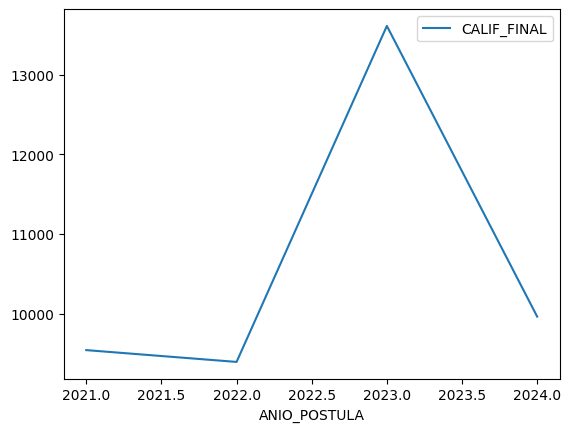

In [244]:
data.groupby('ANIO_POSTULA')[['CALIF_FINAL']].count().plot()

In [245]:
data.pivot_table(index=['ANIO_POSTULA', 'ESPECIALIDAD'],aggfunc='count')[['CALIF_FINAL']]

CALIF_FINAL
ANIO_POSTULA ESPECIALIDAD                          
2021         ARQUITECTURA                       997
             CIENCIA DE LA COMPUTACION          262
             FISICA                             202
             INGENIERIA AMBIENTAL               269
             INGENIERIA CIVIL                  1793
...                                             ...
2024         INGENIERIA QUIMICA                 318
             INGENIERIA SANITARIA                98
             INGENIERIA TEXTIL                   25
             MATEMATICA                          59
             QUIMICA                             30

[113 rows x 1 columns]

<Axes: xlabel='ANIO_POSTULA,ESPECIALIDAD'>

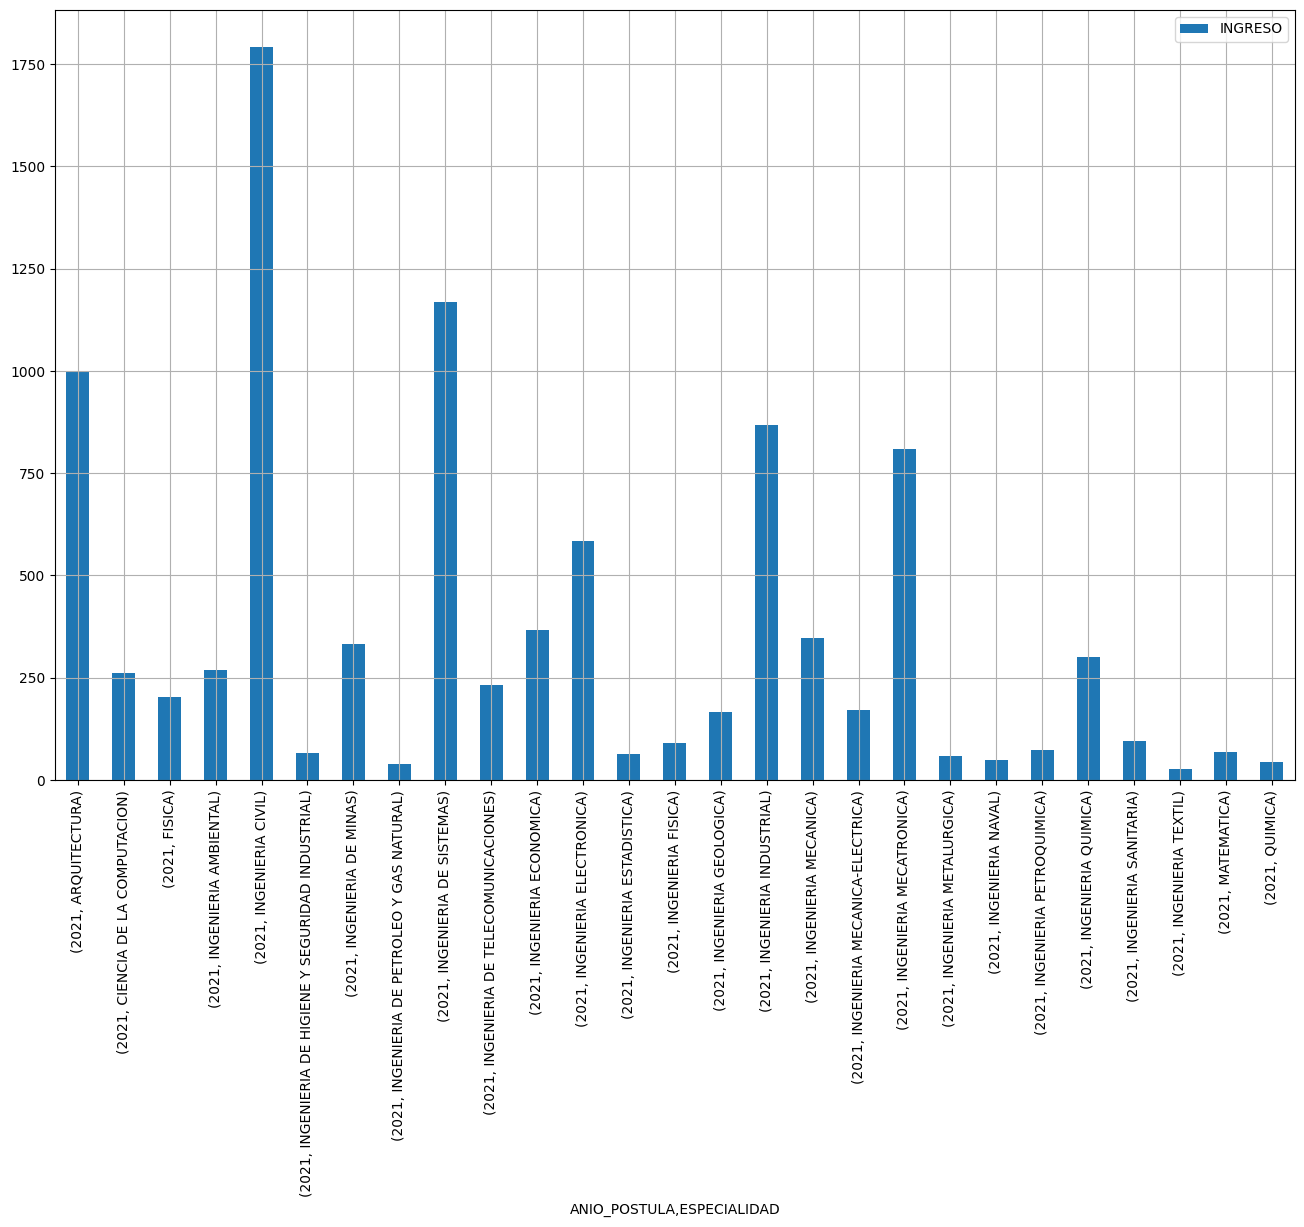

In [246]:
data_2021 =data[(data['ANIO_POSTULA'] == 2021)]
data_2021.pivot_table(index=['ANIO_POSTULA', 'ESPECIALIDAD'],aggfunc='count')[['INGRESO']].plot(kind='bar',figsize=(16,10), grid=True)

#plt.savefig('grafico_ESPECIALIDAD_POSTULANTES.jpg', bbox_inches='tight', dpi=300)

### 1. Número de postulantes e Ingresantes por modalidad 2021

In [247]:
#INGRESANTES POR MODALIDAD DE INGRESO

import pandas as pd
import matplotlib.pyplot as plt
data_2021 =data[(data['ANIO_POSTULA'] == 2021)]
# Filtrar las calificaciones mayores o iguales a 11
df_INGRESO = data_2021[data_2021['INGRESO'] == 'SI']

df_CALIF = data_2021[data_2021['CALIF_FINAL'] >= 11]


# Contar la cantidad de calificaciones por especialidad
especialidad_counts = df_INGRESO['MODALIDAD'].value_counts()
especialidad_counts

MODALIDAD
ORDINARIO                                                                                            768
EXTRAORDINARIO 2 - INGRESO DIRECTO CEPRE                                                             691
EXTRAORDINARIO 1 - DOS PRIMEROS ALUMNOS                                                               46
EXTRAORDINARIO 1 - TITULADO O GRADUADO UNI                                                            32
EXTRAORDINARIO2 - TALENTO BECA 18                                                                     16
EXTRAORDINARIO 1 - TRASLADO EXTERNO                                                                   14
EXTRAORDINARIO 1 - VICTIMAS DEL TERRORISMO (iniciar estudios)                                          3
EXTRAORDINARIO 1 - TITULADOS O GRADUADOS EN OTRA UNIVERSIDAD                                           3
EXTRAORDINARIO1 - TITULADOS O GRADUADOS                                                                2
EXTRAORDINARIO 1 - DIPLOMADOS CON BACHILLERATO                                                         1
EXTRAORDINARIO 1 - TRASLADO EXTERNO PARA ESTUDIANTES PROVENIENTES DE UNIVERSIDADES NO LICENCIADAS      1
EXTRAORDINARIO 1 - CONVENIO ANDRES BELLO (continuar estudios)                                          1
Name: count, dtype: int64

In [248]:
#CANTIDAD DE POSTULANTES POR MODALIDAD DE INGRESO
data_2021 = data[(data['ANIO_POSTULA'] == 2021)]
pivot_data = data_2021.pivot_table(index=['MODALIDAD'], aggfunc='count')[['INGRESO']]
pivot_data_sorted = pivot_data.sort_values(by='INGRESO', ascending=False)
pivot_data_sorted

INGRESO
MODALIDAD                                                  
ORDINARIO                                              6938
EXTRAORDINARIO 2 - INGRESO DIRECTO CEPRE               2112
EXTRAORDINARIO 1 - DOS PRIMEROS ALUMNOS                 270
EXTRAORDINARIO 1 - VICTIMAS DEL TERRORISMO (ini...       76
EXTRAORDINARIO 1 - TRASLADO EXTERNO                      39
EXTRAORDINARIO 1 - TITULADO O GRADUADO UNI               32
EXTRAORDINARIO 1 - DIPLOMADOS CON BACHILLERATO           24
EXTRAORDINARIO2 - TALENTO BECA 18                        16
EXTRAORDINARIO 1 - TITULADOS O GRADUADOS EN OTR...       10
EXTRAORDINARIO1 - TITULADOS O GRADUADOS                   8
EXTRAORDINARIO 1 - VICTIMAS DEL TERRORISMO (con...        5
EXTRAORDINARIO 1 - CONVENIO ANDRES BELLO (conti...        3
EXTRAORDINARIO 1 - CONVENIO ANDRES BELLO (inici...        3
EXTRAORDINARIO 1 - DEPORTISTAS CALIFICADOS DE A...        3
EXTRAORDINARIO 1 - PERSONAS CON DISCAPACIDAD (i...        3
EXTRAORDINARIO 1 - TRASLADO EXTERNO PARA ESTUDI...        3

In [249]:
#INGRESANTES POR MODALIDAD DE INGRESO
data_2021 =data[(data['ANIO_POSTULA'] == 2021)]
# Filtrar las calificaciones mayores o iguales a 11
df_INGRESO = data_2021[data_2021['INGRESO'] == 'SI']
df_CALIF = data_2021[data_2021['CALIF_FINAL'] >= 11]
# Contar la cantidad de calificaciones por modalidad de ingreso
especialidad_counts = df_INGRESO['MODALIDAD'].value_counts()


#CANTIDAD DE POSTULANTES POR MODALIDAD DE INGRESO
data_2021 = data[(data['ANIO_POSTULA'] == 2021)]
pivot_data = data_2021.pivot_table(index=['MODALIDAD'], aggfunc='count')[['INGRESO']]
pivot_data_sorted = pivot_data.sort_values(by='INGRESO', ascending=False)
###############
#tabla combinada con las columnas ['MODALIDAD', 'INGRESO', 'COUNT']
tabla_combinada = pd.merge(pivot_data_sorted, especialidad_counts, on='MODALIDAD')
print(tabla_combinada)


plt.show()

                                                    INGRESO  count
MODALIDAD                                                         
ORDINARIO                                              6938    768
EXTRAORDINARIO 2 - INGRESO DIRECTO CEPRE               2112    691
EXTRAORDINARIO 1 - DOS PRIMEROS ALUMNOS                 270     46
EXTRAORDINARIO 1 - VICTIMAS DEL TERRORISMO (ini...       76      3
EXTRAORDINARIO 1 - TRASLADO EXTERNO                      39     14
EXTRAORDINARIO 1 - TITULADO O GRADUADO UNI               32     32
EXTRAORDINARIO 1 - DIPLOMADOS CON BACHILLERATO           24      1
EXTRAORDINARIO2 - TALENTO BECA 18                        16     16
EXTRAORDINARIO 1 - TITULADOS O GRADUADOS EN OTR...       10      3
EXTRAORDINARIO1 - TITULADOS O GRADUADOS                   8      2
EXTRAORDINARIO 1 - CONVENIO ANDRES BELLO (conti...        3      1
EXTRAORDINARIO 1 - TRASLADO EXTERNO PARA ESTUDI...        3      1


### 2. INGRESANTES POR ESPECIALIDAD DE INGRESO

In [250]:
#POSTULANTES POR ESPECIALIDAD AÑO 2021

data_2021 = data[(data['ANIO_POSTULA'] == 2021)]
pivot_data = data_2021.pivot_table(index=['ESPECIALIDAD'], aggfunc='count')[['INGRESO']]
pivot_data_sorted = pivot_data.sort_values(by='INGRESO', ascending=False)
pivot_data_sorted

INGRESO
ESPECIALIDAD                                         
INGENIERIA CIVIL                                 1793
INGENIERIA DE SISTEMAS                           1168
ARQUITECTURA                                      997
INGENIERIA INDUSTRIAL                             868
INGENIERIA MECATRONICA                            809
INGENIERIA ELECTRONICA                            585
INGENIERIA ECONOMICA                              366
INGENIERIA MECANICA                               347
INGENIERIA DE MINAS                               333
INGENIERIA QUIMICA                                300
INGENIERIA AMBIENTAL                              269
CIENCIA DE LA COMPUTACION                         262
INGENIERIA DE TELECOMUNICACIONES                  233
FISICA                                            202
INGENIERIA MECANICA-ELECTRICA                     172
INGENIERIA GEOLOGICA                              166
INGENIERIA SANITARIA                               95
INGENIERIA FISICA                                  91
INGENIERIA PETROQUIMICA                            74
MATEMATICA                                         68
INGENIERIA DE HIGIENE Y SEGURIDAD INDUSTRIAL       67
INGENIERIA ESTADISTICA                             64
INGENIERIA METALURGICA                             58
INGENIERIA NAVAL                                   49
QUIMICA                                            44
INGENIERIA DE PETROLEO Y GAS NATURAL               38
INGENIERIA TEXTIL                                  27

In [251]:
#INGRESANTES POR ESPECIALIDAD DE INGRESO

data_2021 =data[(data['ANIO_POSTULA'] == 2021)]
# Filtrar los valores de ingresantes = SI
df_INGRESO = data_2021[data_2021['INGRESO'] == 'SI']

#df_CALIF = data_2021[data_2021['CALIF_FINAL'] >= 12]
especialidad_counts = df_INGRESO['ESPECIALIDAD'].value_counts()
especialidad_counts


ESPECIALIDAD
INGENIERIA CIVIL                                242
INGENIERIA DE SISTEMAS                          148
INGENIERIA INDUSTRIAL                           145
INGENIERIA ELECTRONICA                          133
INGENIERIA MECATRONICA                          114
INGENIERIA ECONOMICA                             80
ARQUITECTURA                                     74
CIENCIA DE LA COMPUTACION                        72
INGENIERIA DE MINAS                              66
INGENIERIA MECANICA                              59
INGENIERIA DE TELECOMUNICACIONES                 59
INGENIERIA AMBIENTAL                             59
FISICA                                           51
INGENIERIA QUIMICA                               51
INGENIERIA GEOLOGICA                             38
INGENIERIA MECANICA-ELECTRICA                    36
INGENIERIA SANITARIA                             25
INGENIERIA DE HIGIENE Y SEGURIDAD INDUSTRIAL     22
INGENIERIA FISICA                                22
INGENIERIA PETROQUIMICA                          15
INGENIERIA ESTADISTICA                           14
INGENIERIA METALURGICA                           13
MATEMATICA                                       11
QUIMICA                                          11
INGENIERIA DE PETROLEO Y GAS NATURAL              8
INGENIERIA NAVAL                                  7
INGENIERIA TEXTIL                                 3
Name: count, dtype: int64

In [252]:
#INGRESANTES POR ESPECIALIDAD DE INGRESO
data_2021 =data[(data['ANIO_POSTULA'] == 2021)]
# Filtrar las calificaciones mayores o iguales a 11
df_INGRESO = data_2021[data_2021['INGRESO'] == 'SI']
df_CALIF = data_2021[data_2021['CALIF_FINAL'] >= 11]
# Contar la cantidad de calificaciones por especialidad
especialidad_counts = df_INGRESO['ESPECIALIDAD'].value_counts()


#CANTIDAD DE POSTULANTES POR ESPECIALIDAD DE INGRESO
data_2021 = data[(data['ANIO_POSTULA'] == 2021)]
pivot_data = data_2021.pivot_table(index=['ESPECIALIDAD'], aggfunc='count')[['INGRESO']]
pivot_data_sorted = pivot_data.sort_values(by='INGRESO', ascending=False)
###############
#tabla combinada con las columnas ['ESPECIALIDAD', 'INGRESO', 'COUNT']
tabla_combinada = pd.merge(pivot_data_sorted, especialidad_counts, on='ESPECIALIDAD')
print(tabla_combinada)

plt.show()

                                              INGRESO  count
ESPECIALIDAD                                                
INGENIERIA CIVIL                                 1793    242
INGENIERIA DE SISTEMAS                           1168    148
ARQUITECTURA                                      997     74
INGENIERIA INDUSTRIAL                             868    145
INGENIERIA MECATRONICA                            809    114
INGENIERIA ELECTRONICA                            585    133
INGENIERIA ECONOMICA                              366     80
INGENIERIA MECANICA                               347     59
INGENIERIA DE MINAS                               333     66
INGENIERIA QUIMICA                                300     51
INGENIERIA AMBIENTAL                              269     59
CIENCIA DE LA COMPUTACION                         262     72
INGENIERIA DE TELECOMUNICACIONES                  233     59
FISICA                                            202     51
INGENIERIA MECANICA-ELEC

<Figure size 2000x1000 with 0 Axes>

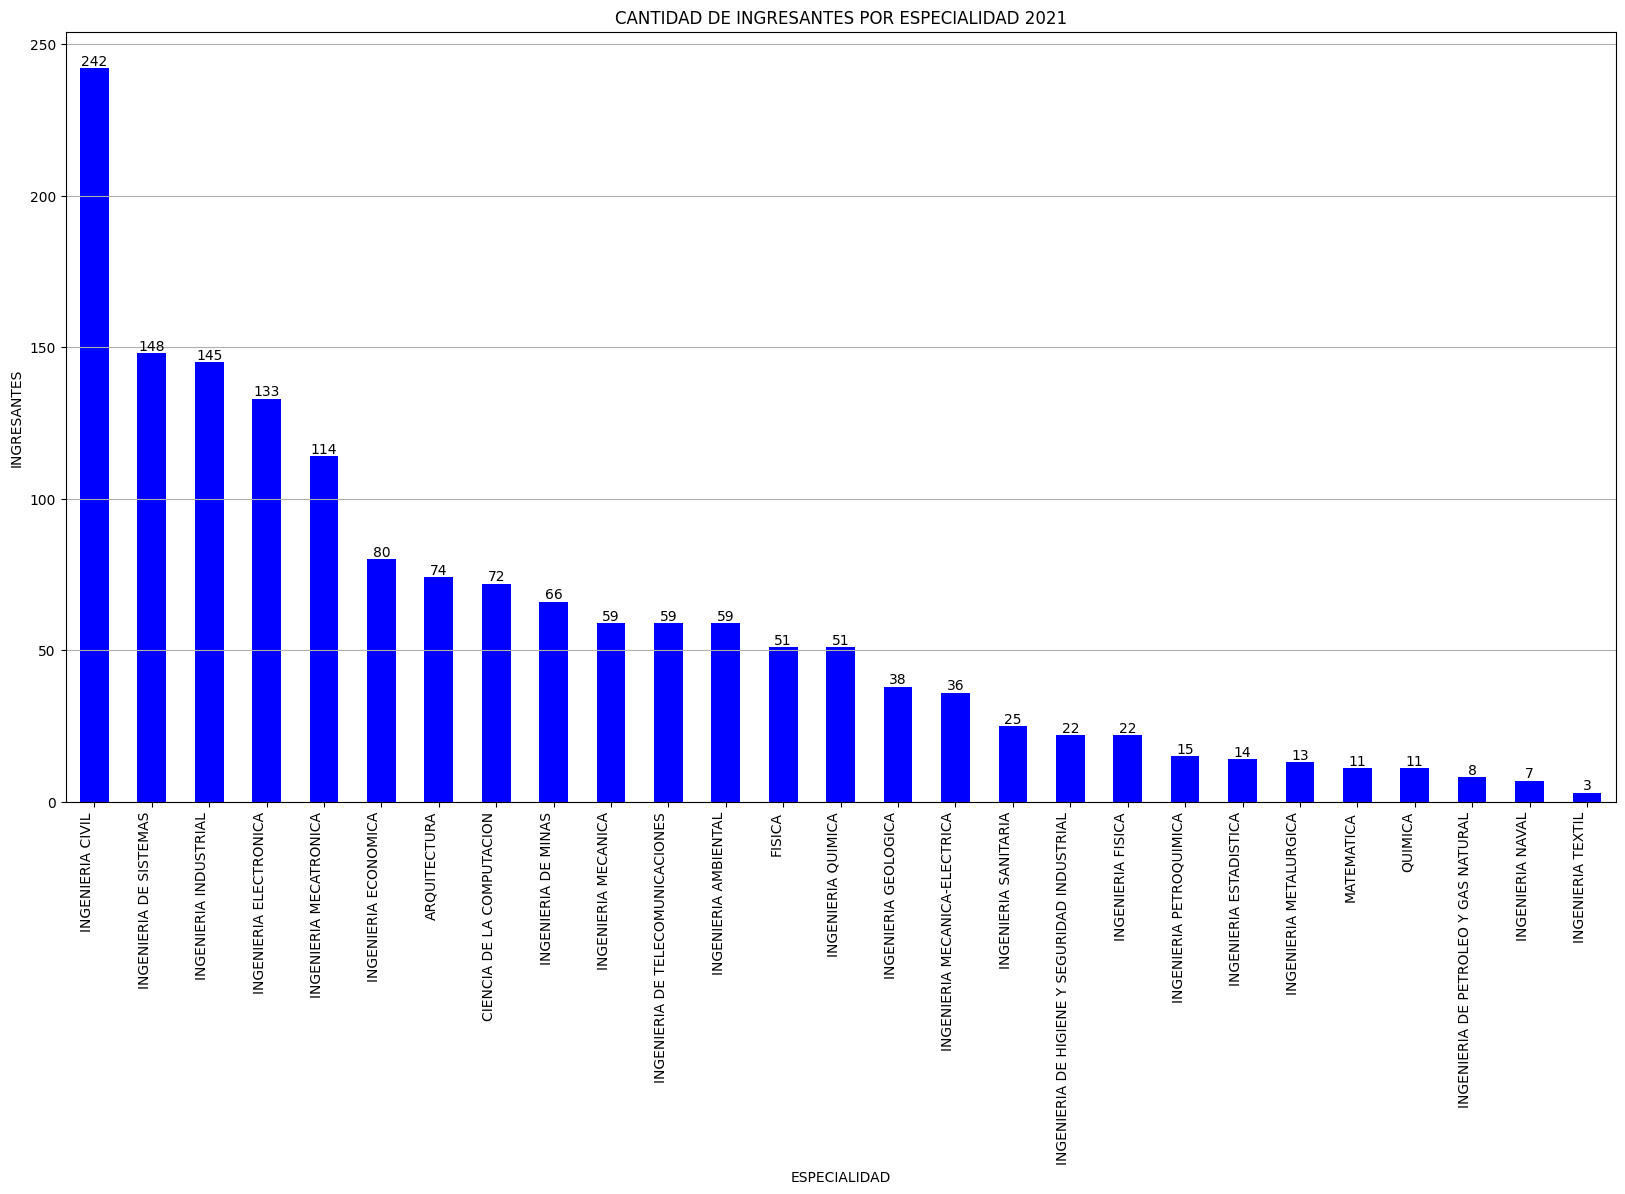

In [253]:
#CANTIDAD DE INGRESANTES POR ESPECIALIDAD
df_filtered = data_2021[data_2021['INGRESO'] == 'SI']
especialidad_counts = df_filtered['ESPECIALIDAD'].value_counts()

plt.figure(figsize=(20, 10))

plt.figure(figsize=(20, 10))
ax = especialidad_counts.plot(kind='bar', color='blue')
ax.bar_label(ax.containers[0]),

plt.title('CANTIDAD DE INGRESANTES POR ESPECIALIDAD 2021')
plt.xlabel('ESPECIALIDAD')
plt.ylabel('INGRESANTES')
plt.xticks(rotation=90, ha='right')
plt.grid(axis='y')
#plt.savefig('grafico_ESPECIALIDAD_ingreso.jpg', bbox_inches='tight', dpi=300)
plt.show()


In [254]:
#postulantes por especialidad y sexo
data_2021 =data[(data['ANIO_POSTULA'] == 2021)]

data_2021.pivot_table(index=['ESPECIALIDAD', 'SEXO'],aggfunc='count')[['INGRESO']]

INGRESO
ESPECIALIDAD                                 SEXO              
ARQUITECTURA                                 FEMENINO       628
                                             MASCULINO      369
CIENCIA DE LA COMPUTACION                    FEMENINO        22
                                             MASCULINO      240
FISICA                                       FEMENINO        27
                                             MASCULINO      175
INGENIERIA AMBIENTAL                         FEMENINO       127
                                             MASCULINO      142
INGENIERIA CIVIL                             FEMENINO       312
                                             MASCULINO     1481
INGENIERIA DE HIGIENE Y SEGURIDAD INDUSTRIAL FEMENINO        32
                                             MASCULINO       35
INGENIERIA DE MINAS                          FEMENINO        54
                                             MASCULINO      279
INGENIERIA DE PETROLEO Y GAS NATURAL         FEMENINO        13
                                             MASCULINO       25
INGENIERIA DE SISTEMAS                       FEMENINO       146
                                             MASCULINO     1022
INGENIERIA DE TELECOMUNICACIONES             FEMENINO        34
                                             MASCULINO      199
INGENIERIA ECONOMICA                         FEMENINO       137
                                             MASCULINO      229
INGENIERIA ELECTRONICA                       FEMENINO        52
                                             MASCULINO      533
INGENIERIA ESTADISTICA                       FEMENINO        21
                                             MASCULINO       43
INGENIERIA FISICA                            FEMENINO        14
                                             MASCULINO       77
INGENIERIA GEOLOGICA                         FEMENINO        56
                                             MASCULINO      110
INGENIERIA INDUSTRIAL                        FEMENINO       286
                                             MASCULINO      582
INGENIERIA MECANICA                          FEMENINO        19
                                             MASCULINO      328
INGENIERIA MECANICA-ELECTRICA                FEMENINO         9
                                             MASCULINO      163
INGENIERIA MECATRONICA                       FEMENINO        79
                                             MASCULINO      730
INGENIERIA METALURGICA                       FEMENINO        16
                                             MASCULINO       42
INGENIERIA NAVAL                             FEMENINO         3
                                             MASCULINO       46
INGENIERIA PETROQUIMICA                      FEMENINO        17
                                             MASCULINO       57
INGENIERIA QUIMICA                           FEMENINO       114
                                             MASCULINO      186
INGENIERIA SANITARIA                         FEMENINO        29
                                             MASCULINO       66
INGENIERIA TEXTIL                            FEMENINO        15
                                             MASCULINO       12
MATEMATICA                                   FEMENINO         7
                                             MASCULINO       61
QUIMICA                                      FEMENINO        16
                                             MASCULINO       28

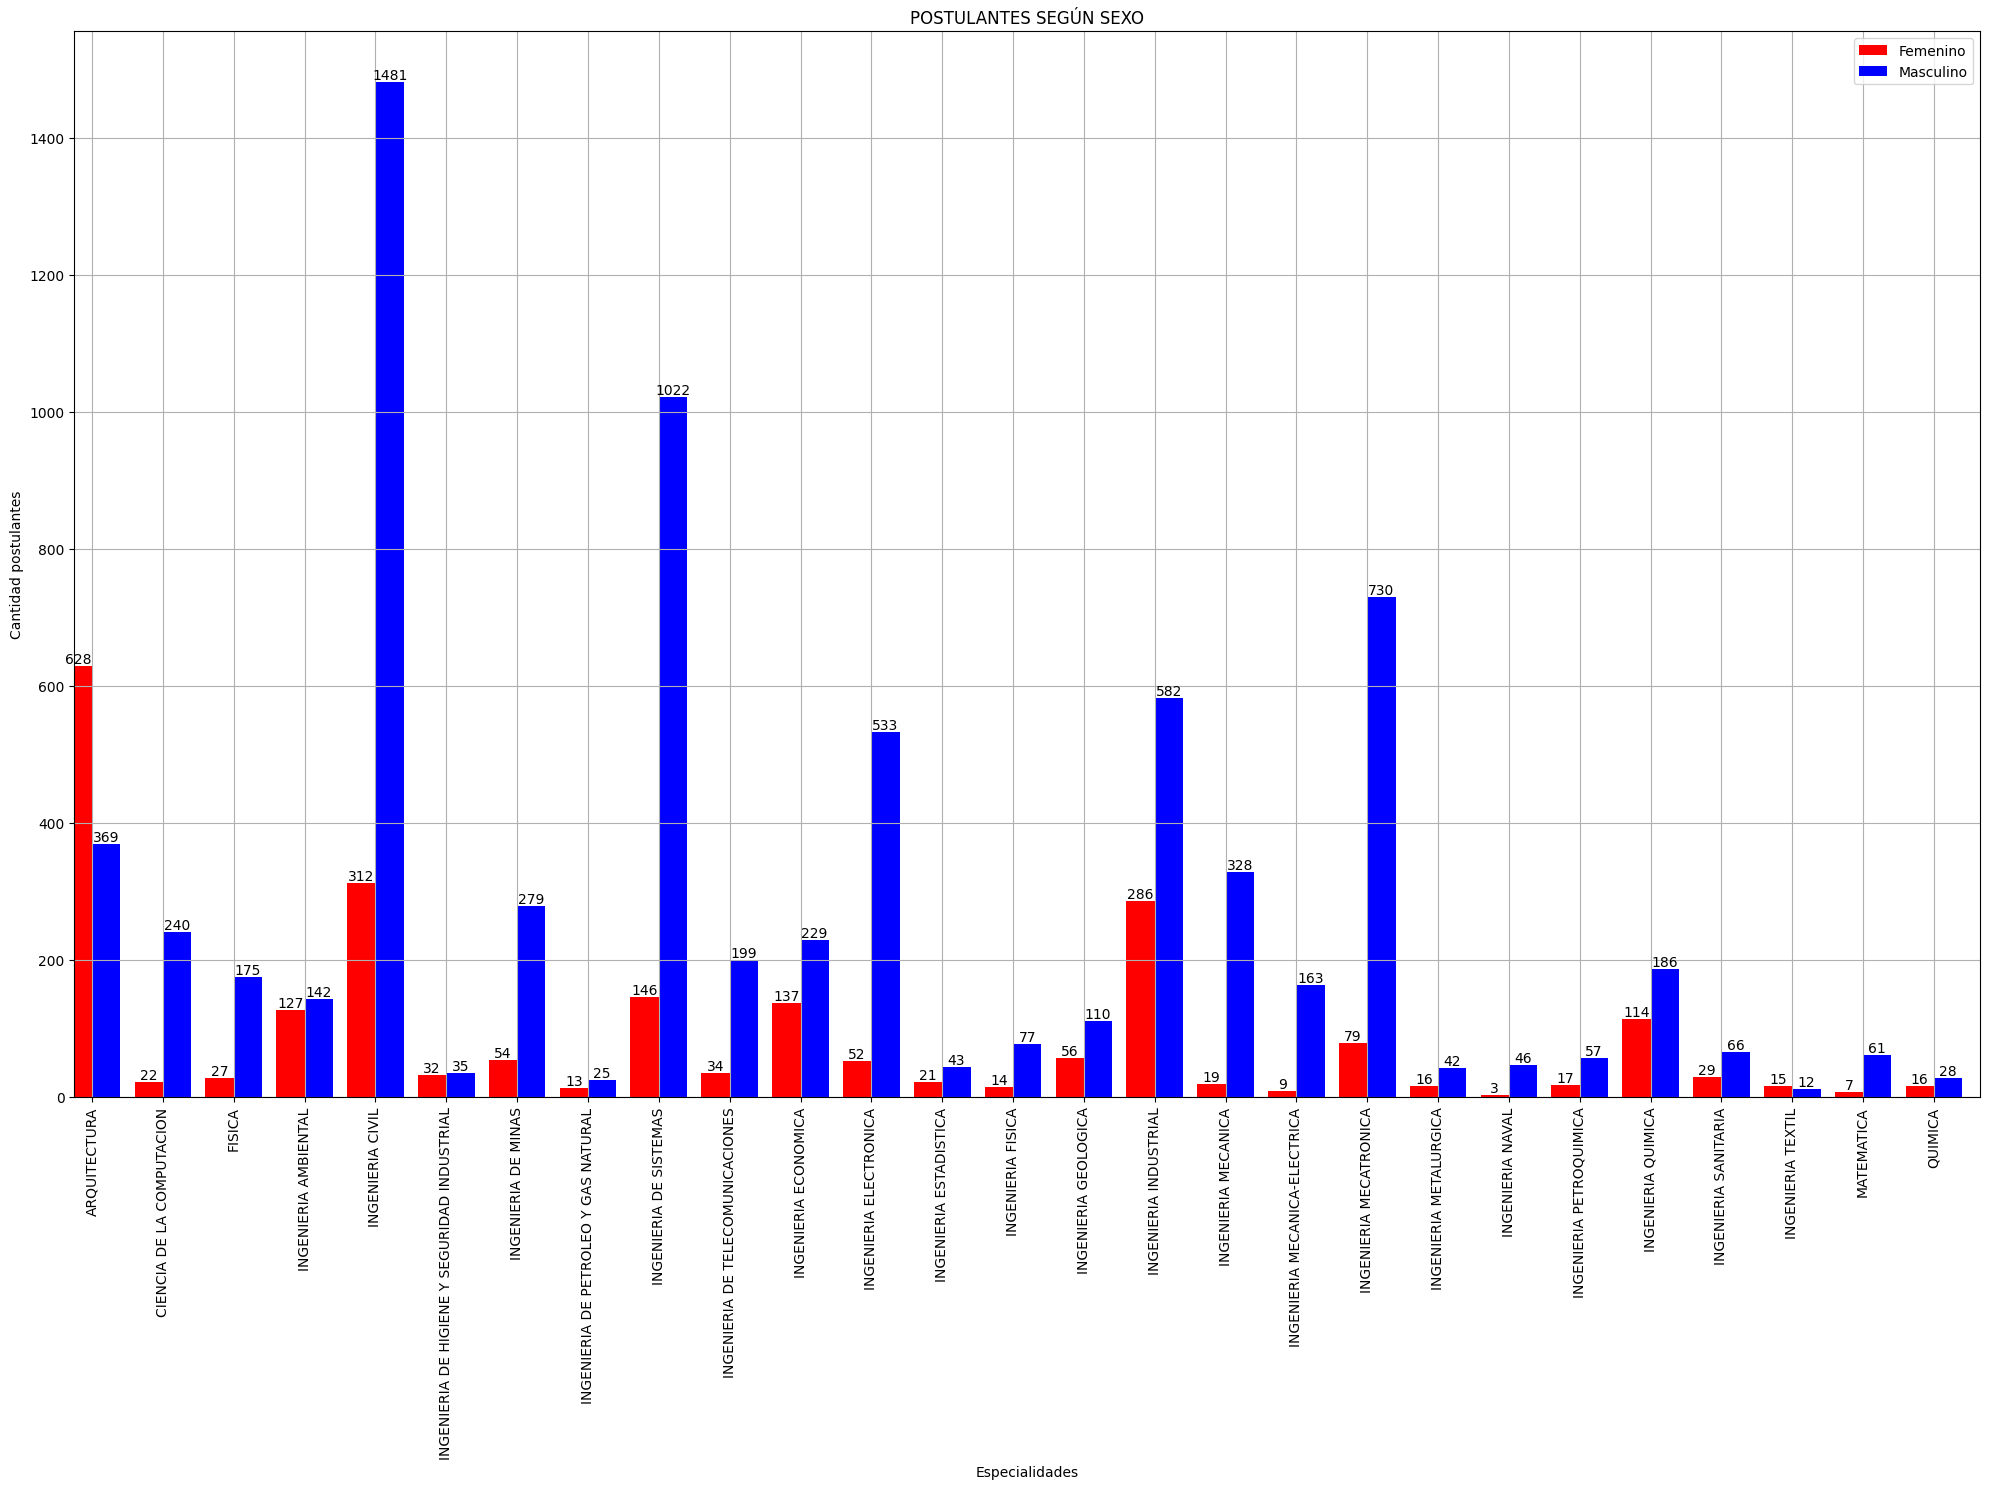

In [255]:
#POSTULANTES POR ESPECIALIDAD AÑO 2021
index = range(len(df_2021['ESPECIALIDAD']))

ax = data_2021.pivot_table(index=['ESPECIALIDAD', 'SEXO'], aggfunc='count')[['INGRESO']]
# Separar los datos por sexo
femenino = ax.xs('FEMENINO', level='SEXO')  # Filtrar por Femenino
masculino = ax.xs('MASCULINO', level='SEXO')  # Filtrar por Masculino

fig, ax = plt.subplots(figsize=(20,15))
femenino['INGRESO'].plot(grid=True, kind='bar', ax=ax, position=1, width=0.4, color='red', label='Femenino')
ax.bar_label(ax.containers[0]);
masculino['INGRESO'].plot(grid=True, kind='bar', ax=ax, position=0, width=0.4, color='blue', label='Masculino')
ax.bar_label(ax.containers[1]);

plt.title('POSTULANTES SEGÚN SEXO')
plt.xlabel('Especialidades')
plt.ylabel('Cantidad postulantes')
ax.legend()

ax.set_yscale('linear')
plt.tight_layout()
#plt.savefig('grafico_ESPECIALIDAD_SEXO_ingreso.jpg', bbox_inches='tight', dpi=300)
plt.show()


### 3. POSTULANTES POR SEXO E INGRESANTES

In [257]:
#postulantes por sexo 2021
pivot_data = data_2021.pivot_table(index='SEXO', values='INGRESO', aggfunc='count')

#ingresantes - 'SI'
ingreso_si = data_2021[data_2021['INGRESO'] == 'SI'].pivot_table(index='SEXO', values='INGRESO', aggfunc='count')

tabla_combinada = pd.merge(pivot_data, ingreso_si, on='SEXO', suffixes=('_TOTAL', '_SI'))
tabla_combinada.columns = ['POSTULANTES', 'INGRESANTES']
print(tabla_combinada)

           POSTULANTES  INGRESANTES
SEXO                               
FEMENINO          2285          243
MASCULINO         7260         1335


### 3.1 Postulantes por modalidad de ingreso y sexo

In [258]:
data_2021 =data[(data['ANIO_POSTULA'] == 2021)]

data_2021.pivot_table(index=['MODALIDAD', 'SEXO'],aggfunc='count')[['INGRESO']]

INGRESO
MODALIDAD                                          SEXO              
EXTRAORDINARIO 1 - CONVENIO ANDRES BELLO (conti... MASCULINO        3
EXTRAORDINARIO 1 - CONVENIO ANDRES BELLO (inici... MASCULINO        3
EXTRAORDINARIO 1 - DEPORTISTAS CALIFICADOS DE A... FEMENINO         1
                                                   MASCULINO        2
EXTRAORDINARIO 1 - DIPLOMADOS CON BACHILLERATO     FEMENINO         5
                                                   MASCULINO       19
EXTRAORDINARIO 1 - DOS PRIMEROS ALUMNOS            FEMENINO        90
                                                   MASCULINO      180
EXTRAORDINARIO 1 - PERSONAS CON DISCAPACIDAD (i... MASCULINO        3
EXTRAORDINARIO 1 - TITULADO O GRADUADO UNI         FEMENINO         3
                                                   MASCULINO       29
EXTRAORDINARIO 1 - TITULADOS O GRADUADOS EN OTR... MASCULINO       10
EXTRAORDINARIO 1 - TRASLADO EXTERNO                FEMENINO         9
                                                   MASCULINO       30
EXTRAORDINARIO 1 - TRASLADO EXTERNO PARA ESTUDI... MASCULINO        3
EXTRAORDINARIO 1 - VICTIMAS DEL TERRORISMO (con... FEMENINO         1
                                                   MASCULINO        4
EXTRAORDINARIO 1 - VICTIMAS DEL TERRORISMO (ini... FEMENINO        17
                                                   MASCULINO       59
EXTRAORDINARIO 2 - INGRESO DIRECTO CEPRE           FEMENINO       554
                                                   MASCULINO     1558
EXTRAORDINARIO1 - TITULADOS O GRADUADOS            FEMENINO         2
                                                   MASCULINO        6
EXTRAORDINARIO2 - TALENTO BECA 18                  FEMENINO         5
                                                   MASCULINO       11
ORDINARIO                                          FEMENINO      1598
                                                   MASCULINO     5340

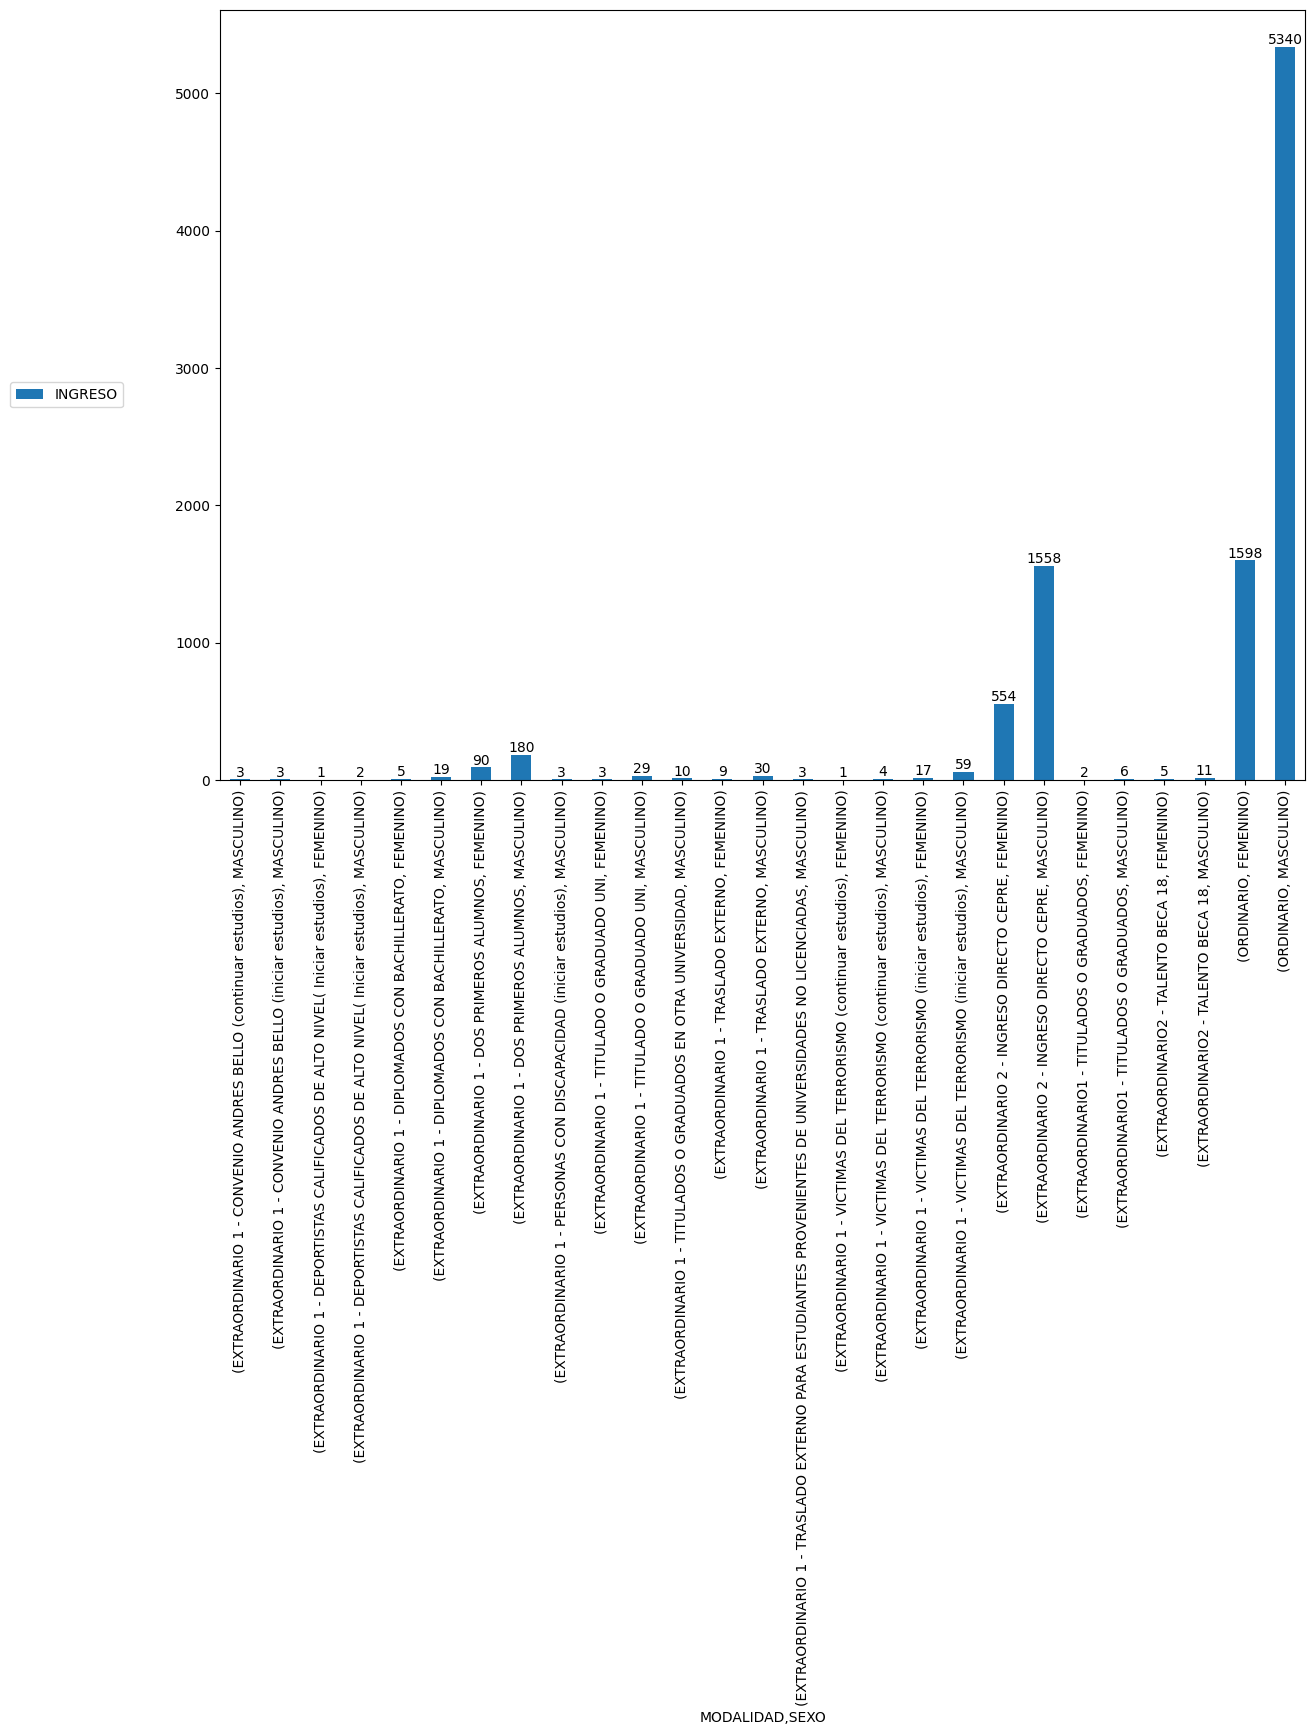

In [259]:
#postulntes por modalidad y sexo año 2021
ax = data_2021.pivot_table(index=['MODALIDAD', 'SEXO'], aggfunc='count')[['INGRESO']].plot(kind='bar', figsize=(14,10))

ax.bar_label(ax.containers[0])
ax.legend(loc='center left', bbox_to_anchor=(-0.2, 0.5))

#plt.savefig('grafico_modalidad_sexo_ingreso.jpg', bbox_inches='tight', dpi=300)
plt.show()

### CANTIDAD DE POSTULANTES POR DEPARTAMENTO 2021-2024

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 141 (\x8d) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 129 (\x81) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 141 (\x8d) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129 (\x81) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


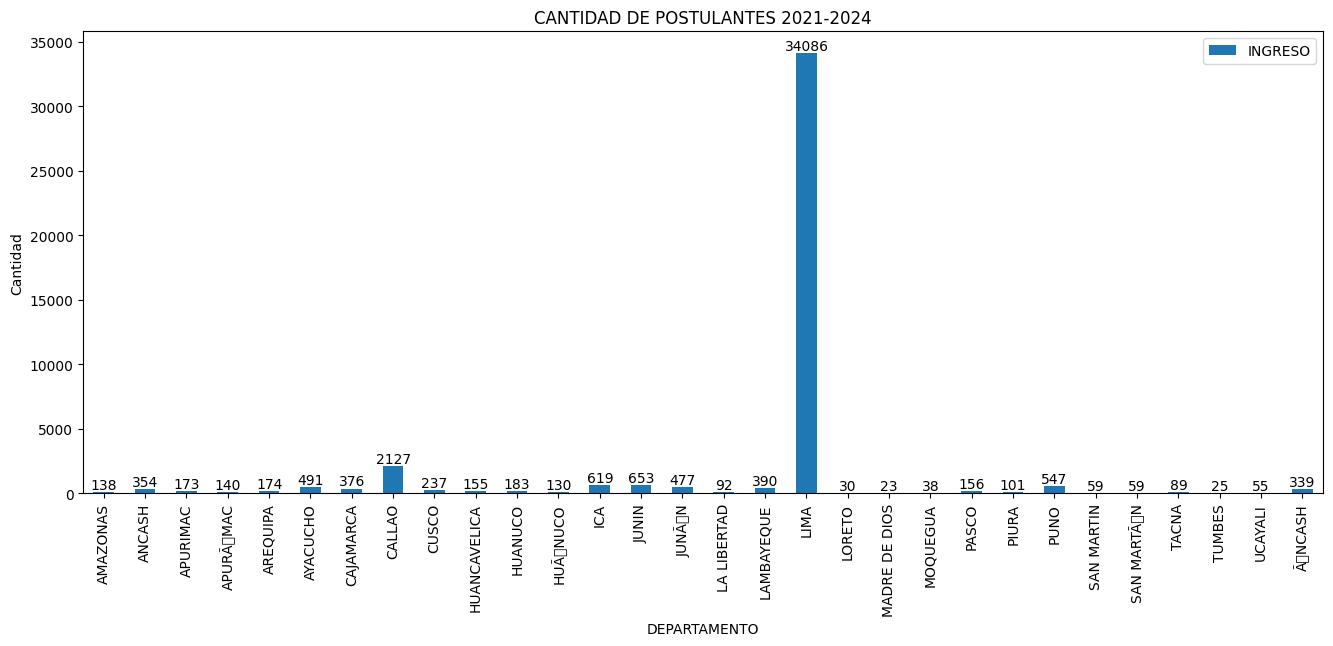

In [265]:
ax = data.groupby('DOMICILIO_DEPA')[['INGRESO']].count().plot(kind='bar', figsize=(16,6), xlabel='DEPARTAMENTO', ylabel='Cantidad', title='CANTIDAD DE POSTULANTES 2021-2024')
ax.bar_label(ax.containers[0]);  #para poner cantidad encima de cada barra

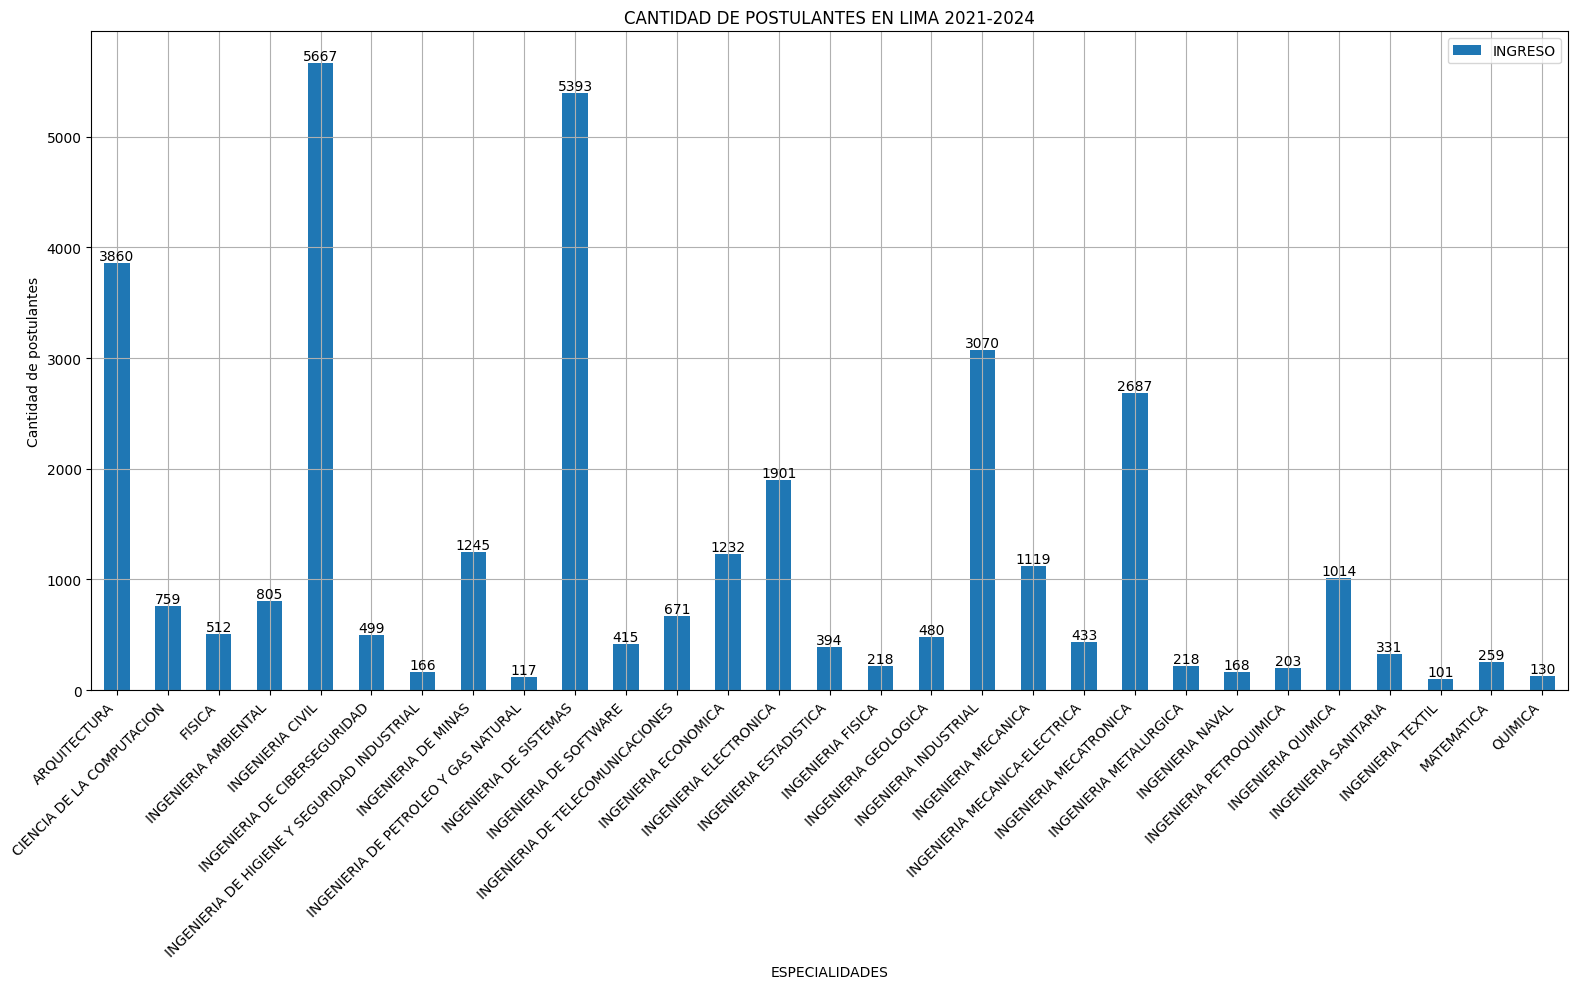

In [268]:
#CANTIDAD DE POSTULANTES EN EL AÑO 2021 EN LIMA POR ESPECIALIDAD

ax = data[data['DOMICILIO_DEPA'] == 'LIMA'].groupby('ESPECIALIDAD')[['INGRESO']].count().plot(kind='bar', figsize=(16,10), xlabel='ESPECIALIDADES', ylabel='Cantidad de postulantes',
                                                                title='CANTIDAD DE POSTULANTES EN LIMA 2021-2024', grid=True)
plt.xticks(rotation=45, ha='right')  #para rotar las etiquetas y alinearlas a la derecha
plt.tight_layout()

ax.bar_label(ax.containers[0]);
#plt.savefig('grafico_POSTULANTES_LIMA_ingreso.jpg', bbox_inches='tight', dpi=300)


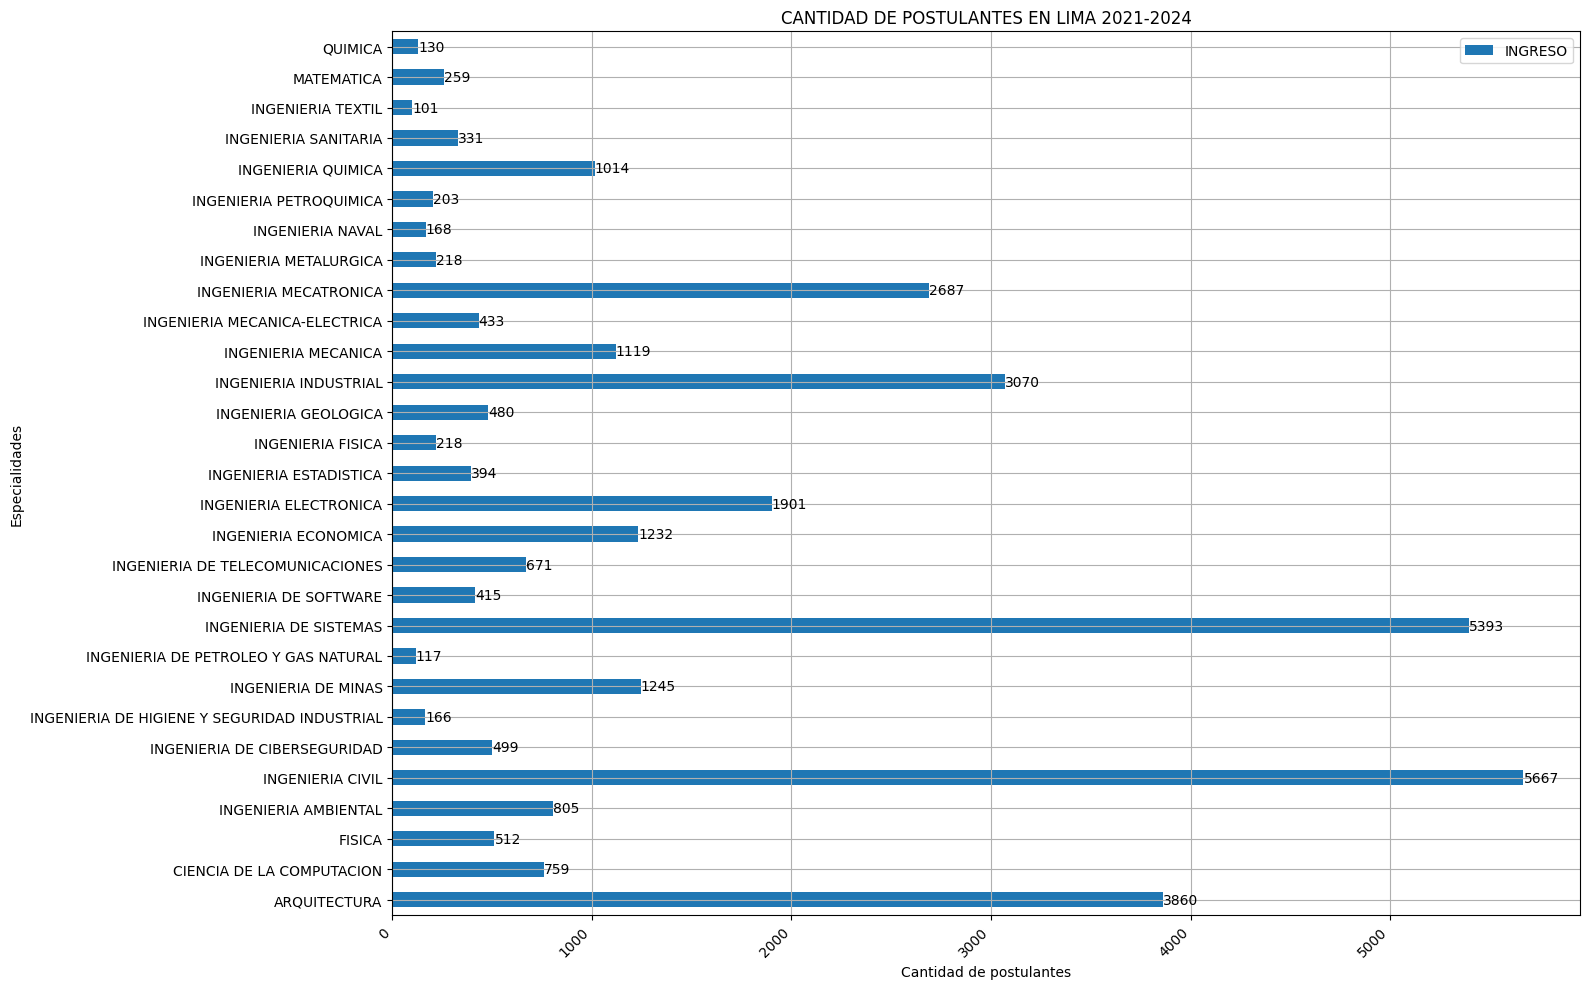

In [271]:
ax = data[data['DOMICILIO_DEPA'] == 'LIMA'].groupby('ESPECIALIDAD')[['INGRESO']].count().plot(kind='barh', figsize=(16,10), xlabel='Cantidad de postulantes', ylabel='Especialidades',
                                                                title='CANTIDAD DE POSTULANTES EN LIMA 2021-2024', grid=True)
plt.xticks(rotation=45, ha='right')  #para rotar las etiquetas y alinearlas a la derecha
plt.tight_layout()

ax.bar_label(ax.containers[0]);
plt.savefig('grafico_LIMA hOR_ingreso.jpg', bbox_inches='tight', dpi=300)

In [171]:
#cantidad de postulantes por sexo
ax = data_2021.pivot_table(index=['ESPECIALIDAD', 'SEXO'], aggfunc='count')[['INGRESO']]
ax

INGRESO
ESPECIALIDAD                                 SEXO              
ARQUITECTURA                                 FEMENINO       628
                                             MASCULINO      369
CIENCIA DE LA COMPUTACION                    FEMENINO        22
                                             MASCULINO      240
FISICA                                       FEMENINO        27
                                             MASCULINO      175
INGENIERIA AMBIENTAL                         FEMENINO       127
                                             MASCULINO      142
INGENIERIA CIVIL                             FEMENINO       312
                                             MASCULINO     1481
INGENIERIA DE HIGIENE Y SEGURIDAD INDUSTRIAL FEMENINO        32
                                             MASCULINO       35
INGENIERIA DE MINAS                          FEMENINO        54
                                             MASCULINO      279
INGENIERIA DE PETROLEO Y GAS NATURAL         FEMENINO        13
                                             MASCULINO       25
INGENIERIA DE SISTEMAS                       FEMENINO       146
                                             MASCULINO     1022
INGENIERIA DE TELECOMUNICACIONES             FEMENINO        34
                                             MASCULINO      199
INGENIERIA ECONOMICA                         FEMENINO       137
                                             MASCULINO      229
INGENIERIA ELECTRONICA                       FEMENINO        52
                                             MASCULINO      533
INGENIERIA ESTADISTICA                       FEMENINO        21
                                             MASCULINO       43
INGENIERIA FISICA                            FEMENINO        14
                                             MASCULINO       77
INGENIERIA GEOLOGICA                         FEMENINO        56
                                             MASCULINO      110
INGENIERIA INDUSTRIAL                        FEMENINO       286
                                             MASCULINO      582
INGENIERIA MECANICA                          FEMENINO        19
                                             MASCULINO      328
INGENIERIA MECANICA-ELECTRICA                FEMENINO         9
                                             MASCULINO      163
INGENIERIA MECATRONICA                       FEMENINO        79
                                             MASCULINO      730
INGENIERIA METALURGICA                       FEMENINO        16
                                             MASCULINO       42
INGENIERIA NAVAL                             FEMENINO         3
                                             MASCULINO       46
INGENIERIA PETROQUIMICA                      FEMENINO        17
                                             MASCULINO       57
INGENIERIA QUIMICA                           FEMENINO       114
                                             MASCULINO      186
INGENIERIA SANITARIA                         FEMENINO        29
                                             MASCULINO       66
INGENIERIA TEXTIL                            FEMENINO        15
                                             MASCULINO       12
MATEMATICA                                   FEMENINO         7
                                             MASCULINO       61
QUIMICA                                      FEMENINO        16
                                             MASCULINO       28

### ANALISIS DE DATOS, REALIZANDO PROYECCION DE INGRESANTES DE MUJERES EN LA UNI

In [272]:
#postulantes por sexo 2021
data_2021 =data[(data['ANIO_POSTULA'] == 2021)]

pivot_data = data_2021.pivot_table(index='SEXO', values='INGRESO', aggfunc='count')
#ingresantes - 'SI'
ingreso_si = data_2021[data_2021['INGRESO'] == 'SI'].pivot_table(index='SEXO', values='INGRESO', aggfunc='count')

tabla_combinada = pd.merge(pivot_data, ingreso_si, on='SEXO', suffixes=('_TOTAL', '_SI'))
tabla_combinada.columns = ['POSTULANTES', 'INGRESANTES']
print(tabla_combinada)

           POSTULANTES  INGRESANTES
SEXO                               
FEMENINO          2285          243
MASCULINO         7260         1335


In [273]:
#postulantes por sexo 2022
data_2022 =data[(data['ANIO_POSTULA'] == 2022)]
pivot_data = data_2022.pivot_table(index='SEXO', values='INGRESO', aggfunc='count')
#ingresantes - 'SI'
ingreso_si = data_2022[data_2022['INGRESO'] == 'SI'].pivot_table(index='SEXO', values='INGRESO', aggfunc='count')

tabla_combinada = pd.merge(pivot_data, ingreso_si, on='SEXO', suffixes=('_TOTAL', '_SI'))
tabla_combinada.columns = ['POSTULANTES', 'INGRESANTES']
print(tabla_combinada)

           POSTULANTES  INGRESANTES
SEXO                               
FEMENINO          2167          363
MASCULINO         7230         1697


In [274]:
#postulantes por sexo 2023
data_2023 =data[(data['ANIO_POSTULA'] == 2023)]
pivot_data = data_2023.pivot_table(index='SEXO', values='INGRESO', aggfunc='count')
#ingresantes - 'SI'
ingreso_si = data_2023[data_2023['INGRESO'] == 'SI'].pivot_table(index='SEXO', values='INGRESO', aggfunc='count')

tabla_combinada = pd.merge(pivot_data, ingreso_si, on='SEXO', suffixes=('_TOTAL', '_SI'))
tabla_combinada.columns = ['POSTULANTES', 'INGRESANTES']
print(tabla_combinada)

           POSTULANTES  INGRESANTES
SEXO                               
FEMENINO          3261          322
MASCULINO        10348         1702


In [275]:
#postulantes por sexo 2024
data_2024 =data[(data['ANIO_POSTULA'] == 2024)]
pivot_data = data_2024.pivot_table(index='SEXO', values='INGRESO', aggfunc='count')
#ingresantes - 'SI'
ingreso_si = data_2024[data_2024['INGRESO'] == 'SI'].pivot_table(index='SEXO', values='INGRESO', aggfunc='count')

tabla_combinada = pd.merge(pivot_data, ingreso_si, on='SEXO', suffixes=('_TOTAL', '_SI'))
tabla_combinada.columns = ['POSTULANTES', 'INGRESANTES']
print(tabla_combinada)

           POSTULANTES  INGRESANTES
SEXO                               
FEMENINO          2384          207
MASCULINO         7581         1112


In [290]:
from sklearn.linear_model import LinearRegression

Coeficiente de determinación (R²): 0.1656
Proyección para 2026: 364.20 ingresantes
Proyección para 2029: 411.30 ingresantes


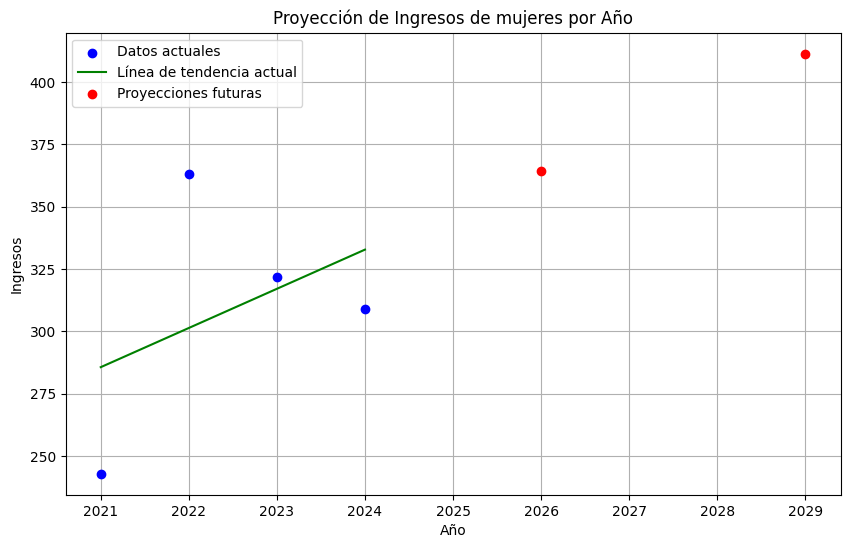

In [296]:
# Datos iniciales de la tabla
data = {'SEXO': ['FEMENINO'],
        'INGRESO2021': [243],
        'INGRESO2022': [363],
        'INGRESO2023': [322],
        'INGRESO2024': [309]}

df = pd.DataFrame(data)
#para realizar la regresion se considero para el año 2024 el valor de 309,
#siendo el promedio de ingreso de mujeres de los años 2021-2023, ya que no se tiene a la fecha el valor total del año 2024

years = np.array([2021, 2022, 2023, 2024]).reshape(-1, 1)
ingresos = np.array([df['INGRESO2021'][0], df['INGRESO2022'][0], df['INGRESO2023'][0], df['INGRESO2024'][0]])

#regresión lineal
model = LinearRegression()
model.fit(years, ingresos)

#coeficiente de determinación R²
r_squared = model.score(years, ingresos)
print(f"Coeficiente de determinación (R²): {r_squared:.4f}")

# Hacer predicciones para los próximos 2 y 5 años (2026 y 2029)
future_years = np.array([2026, 2029]).reshape(-1, 1)
future_predictions = model.predict(future_years)
for year, prediction in zip([2026, 2029], future_predictions):
    print(f"Proyección para {year}: {prediction:.2f} ingresantes")

plt.figure(figsize=(10, 6))
plt.scatter(years, ingresos, color='blue', label='Datos actuales', zorder=5)
plt.plot(years, model.predict(years), color='green', label='Línea de tendencia actual')
plt.scatter(future_years, future_predictions, color='red', label='Proyecciones futuras', zorder=5)

plt.title('Proyección de Ingresos de mujeres por Año')
plt.xlabel('Año')
plt.ylabel('Ingresos')
plt.grid(True)
plt.legend()
plt.savefig('proyeccion_ingresos.jpg', bbox_inches='tight', dpi=300)
plt.show()